# Projet 

### enportation des données

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans 

In [3]:
df = pd.read_csv('C:/Users/chikh/Downloads/tweetos_aggregate_data.csv')
df.head()

,author_id,_id,conversation_id,id,in_reply_to_user_id,referenced_tweets,reply_settings,source_count,Numbers_of_tweet,tweet_like_count_sum,...,time_between_tweet_start_Q1,time_between_tweet_start_median,time_between_tweet_start_Q3,time_between_tweet_start_max,user_id,user_followers_count,user_following_count,user_listed_count,user_tweet_count,user_verified
0,1000000830072815616,6161c0d7e0053da27c2eceb3 6161bf7fe0053da27c2e6a3c,1417873568906551302 1417487640367190026,1417873568906551302 1417487640367190026,nan nan,nan nan,everyone everyone,2,2,2,...,8 days 20:36:06.250000,9 days 02:59:29.500000,9 days 09:22:52.750000,9 days 15:46:16,1000000830072815616,1030,456,2,15479,0
1,1000000889342644224,6161b28290748057b7c0471e 6161bcb9e0053da27c2d0...,1414652460774432774 1416429748578885640 141923...,1414652460774432774 1416429748578885640 141924...,nan 1378751432954888197,"nan [{""type"":""replied_to"",""id"":""1419239899153...",everyone everyone everyone,3,3,0,...,3 days 05:17:53,5 days 16:09:02,9 days 13:18:15.500000,13 days 10:27:29,1000000889342644224,208,193,14,38516,0
2,1000002263325335552,6161bdfae0053da27c2dd1c0 6161c729e0053da27c308e2a,1417218344386711554 1419275031193047043,1417218344386711554 1419275031193047043,nan nan,nan nan,everyone everyone,2,2,4,...,9 days 06:25:46,10 days 16:28:54,12 days 02:32:02,13 days 12:35:10,1000002263325335552,456,548,0,9485,0
3,1000002361161592832,6161cdbfe0053da27c33fc8d,1422574437396852739,1422574437396852739,NaN,NaN,everyone,1,1,1,...,22 days 15:05:50,22 days 15:05:50,22 days 15:05:50,22 days 15:05:50,1000002361161592832,272,184,0,13112,0
4,1000002642637094915,6161b22190748057b7bff118 61619d7f25ee7ffa0fa65eaa,1414649232292712455 1414976726917058563,1414672499850289157 1414976726917058563,1229511182639390720 nan,"[{""type"":""replied_to"",""id"":""141464923229271245...",everyone everyone,2,2,5,...,1 days 00:48:34.500000,1 days 05:50:48,1 days 10:53:01.500000,1 days 15:55:15,1000002642637094915,99,289,0,14761,0


In [4]:
colonnes_a_garder = ['user_followers_count','user_following_count','user_listed_count','user_tweet_count']
nouveau_df = df[colonnes_a_garder]
nouveau_df.head()

,user_followers_count,user_following_count,user_listed_count,user_tweet_count
0,1030,456,2,15479
1,208,193,14,38516
2,456,548,0,9485
3,272,184,0,13112
4,99,289,0,14761


population : tweetos

variable: quantitatives

donc la question qui s'oppose est ACP ou ACPN ?

### normaliser et reduire

In [5]:
# Initialiser le scaler
scaler = StandardScaler()

# Normaliser et réduire les données
nouveau_df_normalized = scaler.fit_transform(nouveau_df)

# Convertir le tableau normalisé en DataFrame
nouveau_df_normalized = pd.DataFrame(nouveau_df_normalized, columns=colonnes_a_garder)

# Afficher les premières lignes du DataFrame normalisé
print(nouveau_df_normalized.head())

   user_followers_count  user_following_count  user_listed_count  \
0             -0.016153             -0.045524          -0.074103   
1             -0.036724             -0.275254           0.003786   
2             -0.030518              0.034837          -0.087085   
3             -0.035123             -0.283116          -0.087085   
4             -0.039452             -0.191398          -0.087085   

   user_tweet_count  
0          0.007961  
1          0.640932  
2         -0.156732  
3         -0.057076  
4         -0.011767  


### calcul des ecarts-types

In [6]:

ecart_types = nouveau_df.apply(lambda x: x.std(), axis=0)

print(ecart_types)

user_followers_count    39958.334334
user_following_count     1144.825033
user_listed_count         154.065271
user_tweet_count        36395.065507
dtype: float64


sigma(user_followers_count)>>>>>sigma(user_listed_count )
donc on passe par une ACPN 

### matrice de cor

In [7]:
matrice_correlation = nouveau_df[colonnes_a_garder].corr()
print(matrice_correlation)

                      user_followers_count  user_following_count  \
user_followers_count              1.000000              0.067235   
user_following_count              0.067235              1.000000   
user_listed_count                 0.828955              0.115565   
user_tweet_count                  0.105925              0.266070   

                      user_listed_count  user_tweet_count  
user_followers_count           0.828955          0.105925  
user_following_count           0.115565          0.266070  
user_listed_count              1.000000          0.207965  
user_tweet_count               0.207965          1.000000  


In [8]:
matrice_correlation_df = pd.DataFrame(matrice_correlation)
print(matrice_correlation_df)

                      user_followers_count  user_following_count  \
user_followers_count              1.000000              0.067235   
user_following_count              0.067235              1.000000   
user_listed_count                 0.828955              0.115565   
user_tweet_count                  0.105925              0.266070   

                      user_listed_count  user_tweet_count  
user_followers_count           0.828955          0.105925  
user_following_count           0.115565          0.266070  
user_listed_count              1.000000          0.207965  
user_tweet_count               0.207965          1.000000  


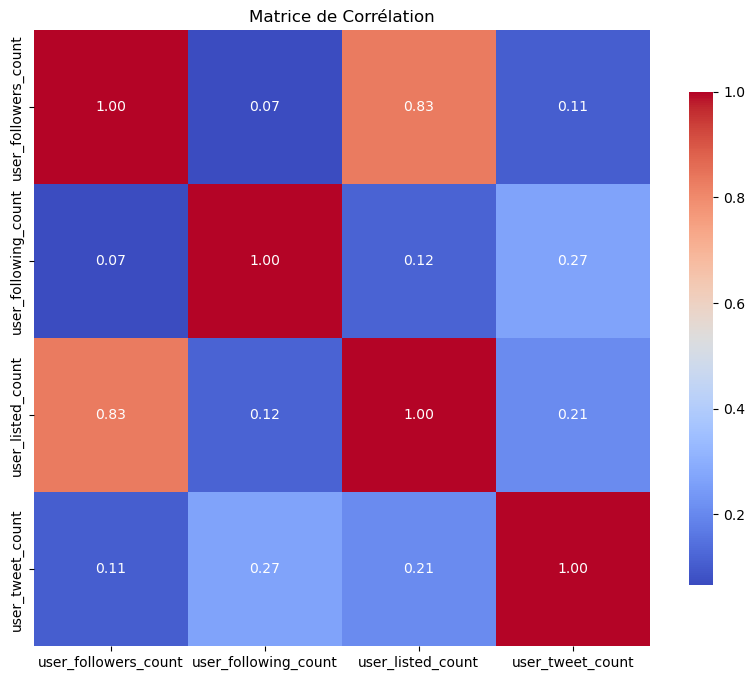

In [9]:
matcor = nouveau_df.corr()
# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matcor, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, 
            xticklabels=nouveau_df.columns, yticklabels=nouveau_df.columns)
plt.title('Matrice de Corrélation')
plt.show()

Explained variance ratio: [0.48161424 0.29452487 0.18276172 0.04109917]


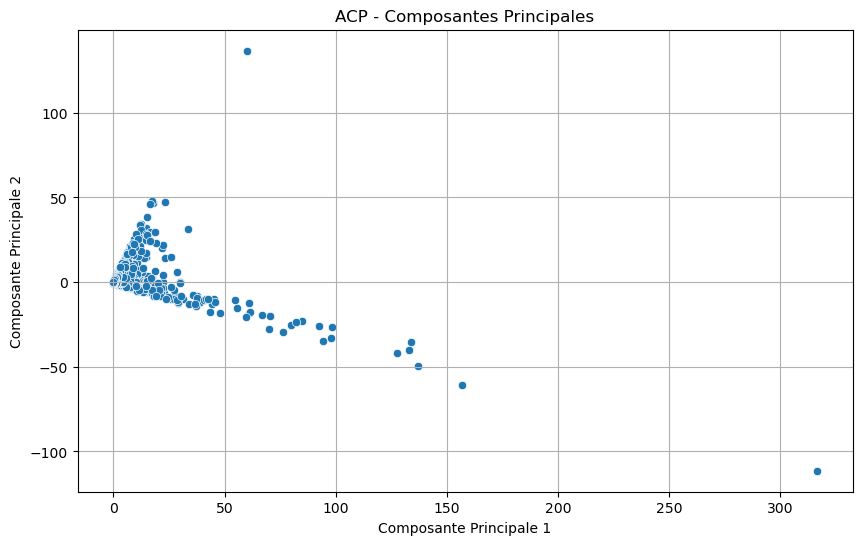

In [10]:
# Effectuer l'ACP
pca = PCA(n_components=4)
res_ACP = pca.fit_transform(nouveau_df_normalized)

# Afficher un résumé des résultats
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualiser les résultats de l'ACP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=res_ACP[:, 0], y=res_ACP[:, 1])
plt.title("ACP - Composantes Principales")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid()
plt.show()

d apres le graphe on a une idée qu on peut déviser nos données en 2 grp distincs

In [11]:
# Initialiser PCA avec le nombre de composantes souhaité
nbre_composantes = min(nouveau_df_normalized.shape)  # Utilise le nombre de lignes ou de colonnes
pca = PCA(n_components=nbre_composantes)

# Adapter le modèle et transformer les données
X_CR = pca.fit_transform(nouveau_df_normalized)

# Afficher les résultats
print("Données transformées :")
print(X_CR)

# Afficher les valeurs propres
print("Valeurs propres :")
print(pca.explained_variance_)

# Afficher le ratio de variance expliquée par chaque composante
print("Variance expliquée par composante :")
print(pca.explained_variance_ratio_)

Données transformées :
[[-0.0676856  -0.00697136 -0.03911669  0.04156897]
 [ 0.10348491  0.22040559 -0.65435122  0.02142201]
 [-0.11574282 -0.0474696   0.13359411  0.02822517]
 ...
 [-0.09165141  0.05567477  0.40723898  0.00755017]
 [ 0.4361148   1.23760123  0.13571341  0.13320497]
 [-0.1038259  -0.06639858 -0.08208711  0.03270129]]
Valeurs propres :
[1.92646528 1.17810458 0.73105004 0.16439739]
Variance expliquée par composante :
[0.48161424 0.29452487 0.18276172 0.04109917]


si on garde 2 axes on garde 77% d information ce qui est suffisant 

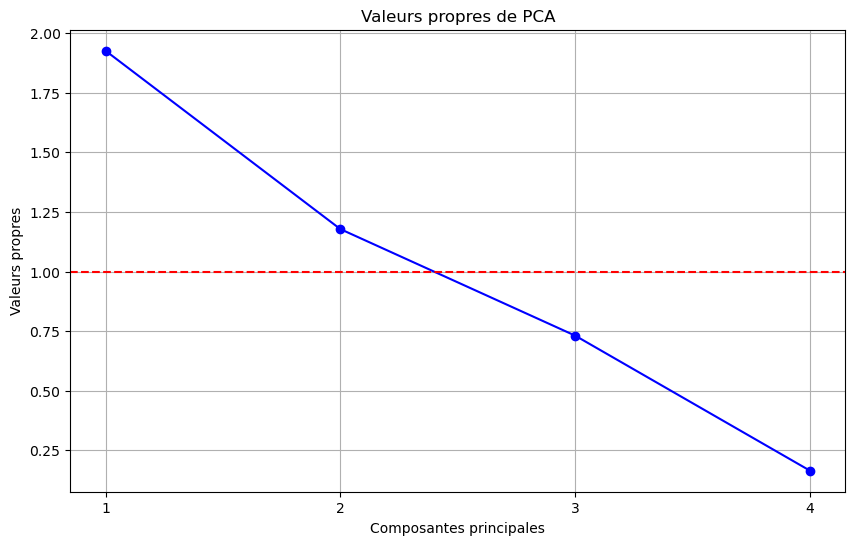

In [12]:
# Récupérer les valeurs propres
eigenvalues = pca.explained_variance_

# Tracer les valeurs propres
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axhline(y=1, color='r', linestyle='--')  # Ligne horizontale à h = 1
plt.title("Valeurs propres de PCA")
plt.xlabel("Composantes principales")
plt.ylabel("Valeurs propres")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()

d apres la methode du coude on voit aussi que le meilleur choix est de garder 2 axes

In [13]:
# Extraire les composantes principales
components = pca.components_.T

# Calculer la corrélation entre les variables d'origine et les composantes principales
correlations = np.corrcoef(nouveau_df_normalized.T, pca.transform(nouveau_df_normalized).T)[:len(nouveau_df_normalized.columns), len(nouveau_df_normalized.columns):]

# Convertir en DataFrame pour un affichage propre
corr_df = pd.DataFrame(correlations, columns=[f'PC{i+1}' for i in range(components.shape[1])], index=nouveau_df_normalized.columns)

# Affichage des corrélations pour les axes 1 à 2
print(corr_df.iloc[:, :2])

                           PC1       PC2
user_followers_count  0.901083 -0.321903
user_following_count  0.295776  0.752382
user_listed_count     0.932318 -0.216974
user_tweet_count      0.397248  0.679206


axe 1 : --->user_followers_count/user_listed_count

axe2:--->user_following_count/user_tweet_count

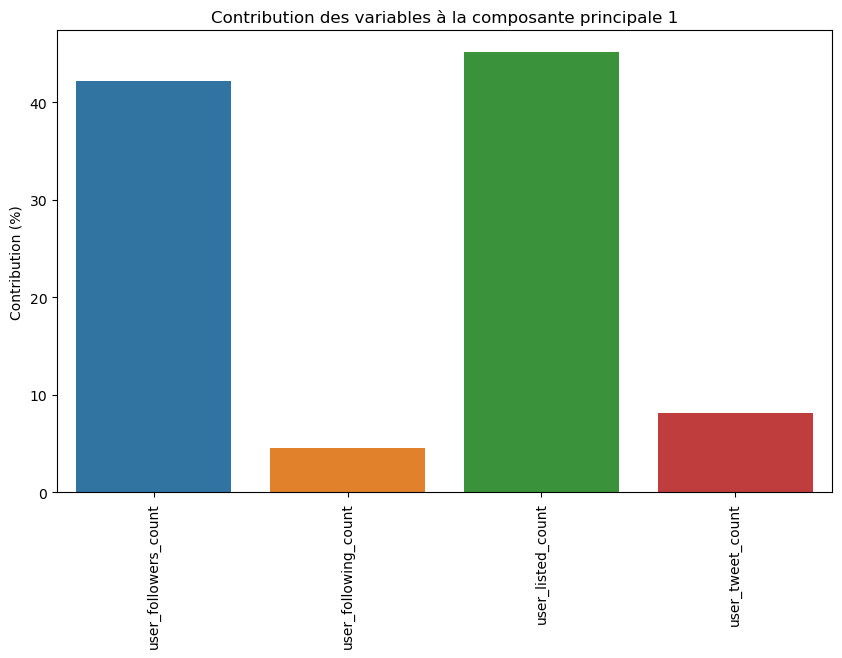

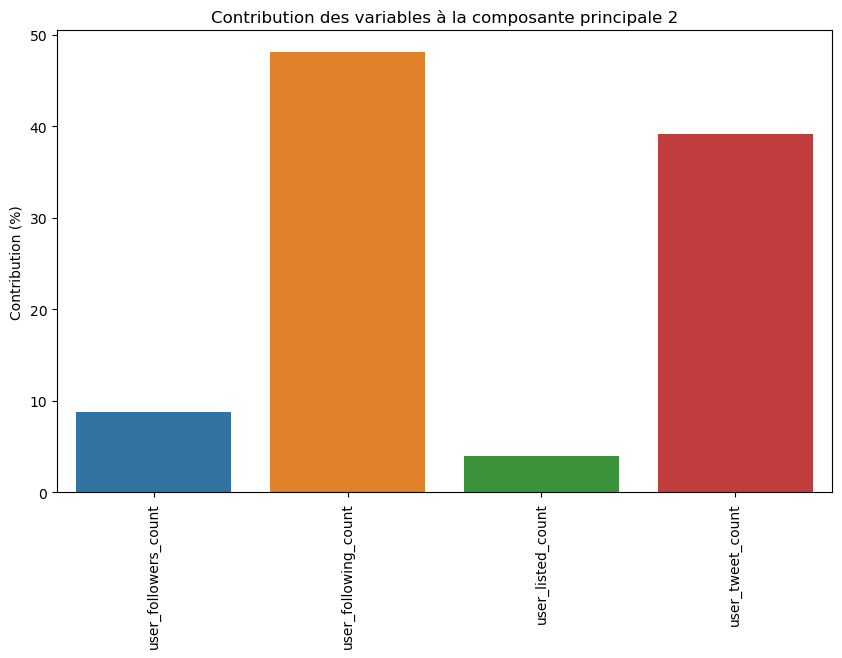

In [14]:
#  Calculer les contributions des variables aux axes
# Le calcul de la contribution est donné par : (coordonnées^2 / somme des coordonnées^2) * 100
var_contrib = np.square(pca.components_) * 100 / np.sum(np.square(pca.components_), axis=1, keepdims=True)

# Transformer en DataFrame pour un affichage plus simple
contrib_df = pd.DataFrame(var_contrib.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=colonnes_a_garder)

#  Fonction pour afficher les contributions
def plot_contrib(contrib_df, axe):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=contrib_df.index, y=contrib_df[f'PC{axe}'])
    plt.xticks(rotation=90)
    plt.title(f'Contribution des variables à la composante principale {axe}')
    plt.ylabel('Contribution (%)')
    plt.show()

#  Afficher les contributions pour les axes 1, 2
plot_contrib(contrib_df, 1)  # Contributions à l'axe 1
plot_contrib(contrib_df, 2)  # Contributions à l'axe 2

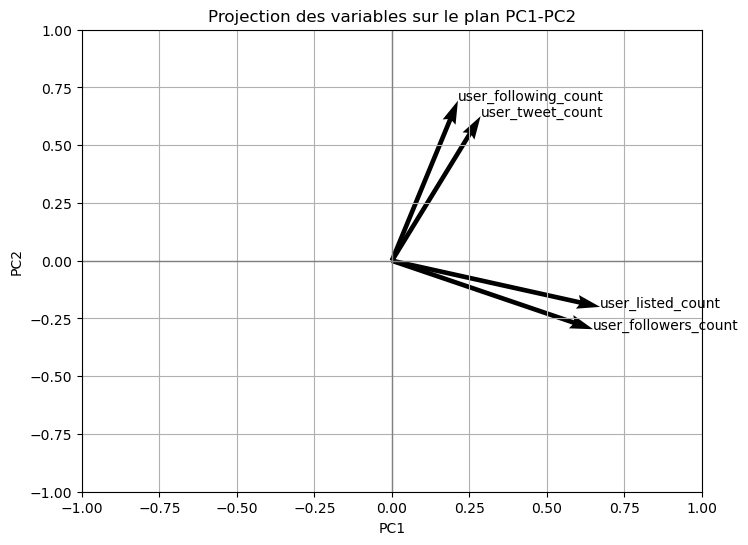

In [15]:
# On récupère les correlation entre les variables et les composantes principales
loadings = pca.components_.T

# Graphique pour les axes 1 et 2
plt.figure(figsize=(8,6))
plt.quiver([0]*loadings.shape[0], [0]*loadings.shape[0], loadings[:, 0], loadings[:, 1], 
           angles='xy', scale_units='xy', scale=1)
for i, var in enumerate(nouveau_df.columns):
    plt.text(loadings[i, 0], loadings[i, 1], var)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des variables sur le plan PC1-PC2")
plt.grid()
plt.show()


In [16]:
# Calcul des cos² (qualité de projection) pour chaque individu sur chaque axe
cos2 = (res_ACP**2) / np.sum(res_ACP**2, axis=1, keepdims=True)

# Etape 2 : Trouver les points mal projetés pour chaque axe (cos² < 0.2)
for i in range(2):  # pour les axes 1 à 2
    print(f"Points mal projetés sur l'axe {i+1}:")
    
    # Filtrage des points avec cos² < 0.2
    mal_proj = cos2[:, i] < 0.2
    print(f"Indices des points mal projetés : {np.where(mal_proj)[0]}")
    
    # Optionnel : affichage des cos² des points mal projetés
    print(f"Valeurs cos² : {cos2[mal_proj, i]}")
    
    

Points mal projetés sur l'axe 1:
Indices des points mal projetés : [     1      6      9 ... 231367 231369 231370]
Valeurs cos² : [0.02194843 0.02413488 0.17616339 ... 0.17074922 0.04735045 0.10818802]
Points mal projetés sur l'axe 2:
Indices des points mal projetés : [     0      1      2 ... 231367 231369 231371]
Valeurs cos² : [0.00616121 0.09956224 0.06570756 ... 0.0195448  0.0174728  0.19171689]


In [17]:
#forte contrib
for i in range(2):
    print(f"Points ayant une forte contribution sur l'axe {i+1}:")
    
    # Calcul de la contribution sur l'axe i (comme en R)
    coord = res_ACP[:, i]  # Coordonnées des points sur l'axe i
    contrib = (coord**2 / np.sum(coord**2)) * 100  # Contribution en %

    # Sélection des points ayant une forte contribution (contribution > sqrt(valeur propre))
    threshold = np.sqrt(pca.explained_variance_[i])
    high_contrib = np.abs(coord) > threshold

    # Création d'un DataFrame pour les contributions
    val = pd.DataFrame({'contribution': contrib[high_contrib]})
    print(val)

Points ayant une forte contribution sur l'axe 1:
      contribution
0         0.000454
1         0.000569
2         0.000435
3         0.000643
4         0.000482
...            ...
5435      0.002181
5436      0.000657
5437      0.000685
5438      0.000658
5439      0.000498

[5440 rows x 1 columns]
Points ayant une forte contribution sur l'axe 2:
       contribution
0          0.002183
1          0.000659
2          0.003485
3          0.000596
4          0.002462
...             ...
17235      0.001042
17236      0.001732
17237      0.000881
17238      0.001051
17239      0.000562

[17240 rows x 1 columns]


CHA

In [18]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Trace des graphiques après la boucle
    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Nombre de clusters (K)')
    plt.ylabel('Inertie')
    plt.title('Inertie en fonction du nombre de clusters')
    plt.grid(True)
    plt.show()


C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

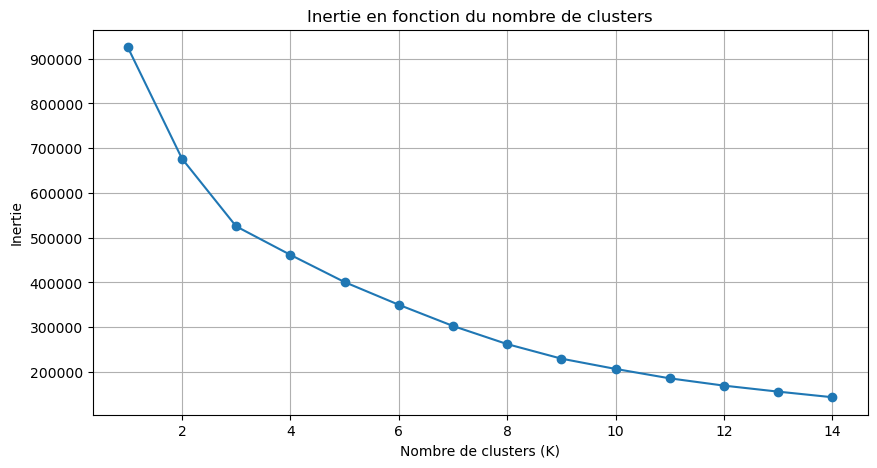

In [19]:
optimise_k_means(nouveau_df_normalized,15)

In [20]:
kmeans=KMeans(n_clusters=8)

In [21]:
kmeans.fit(nouveau_df_normalized)

C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [22]:
df['kmeans_3']=kmeans.labels_

In [23]:
df

,author_id,_id,conversation_id,id,in_reply_to_user_id,referenced_tweets,reply_settings,source_count,Numbers_of_tweet,tweet_like_count_sum,...,time_between_tweet_start_median,time_between_tweet_start_Q3,time_between_tweet_start_max,user_id,user_followers_count,user_following_count,user_listed_count,user_tweet_count,user_verified,kmeans_3
0,1000000830072815616,6161c0d7e0053da27c2eceb3 6161bf7fe0053da27c2e6a3c,1417873568906551302 1417487640367190026,1417873568906551302 1417487640367190026,nan nan,nan nan,everyone everyone,2,2,2,...,9 days 02:59:29.500000,9 days 09:22:52.750000,9 days 15:46:16,1000000830072815616,1030,456,2,15479,0,0
1,1000000889342644224,6161b28290748057b7c0471e 6161bcb9e0053da27c2d0...,1414652460774432774 1416429748578885640 141923...,1414652460774432774 1416429748578885640 141924...,nan 1378751432954888197,"nan [{""type"":""replied_to"",""id"":""1419239899153...",everyone everyone everyone,3,3,0,...,5 days 16:09:02,9 days 13:18:15.500000,13 days 10:27:29,1000000889342644224,208,193,14,38516,0,0
2,1000002263325335552,6161bdfae0053da27c2dd1c0 6161c729e0053da27c308e2a,1417218344386711554 1419275031193047043,1417218344386711554 1419275031193047043,nan nan,nan nan,everyone everyone,2,2,4,...,10 days 16:28:54,12 days 02:32:02,13 days 12:35:10,1000002263325335552,456,548,0,9485,0,0
3,1000002361161592832,6161cdbfe0053da27c33fc8d,1422574437396852739,1422574437396852739,NaN,NaN,everyone,1,1,1,...,22 days 15:05:50,22 days 15:05:50,22 days 15:05:50,1000002361161592832,272,184,0,13112,0,0
4,1000002642637094915,6161b22190748057b7bff118 61619d7f25ee7ffa0fa65eaa,1414649232292712455 1414976726917058563,1414672499850289157 1414976726917058563,1229511182639390720 nan,"[{""type"":""replied_to"",""id"":""141464923229271245...",everyone everyone,2,2,5,...,1 days 05:50:48,1 days 10:53:01.500000,1 days 15:55:15,1000002642637094915,99,289,0,14761,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231367,999994651145883649,61619e2525ee7ffa0fa6e131,1414737069637783552,1414869553302188035,1396517329169797134,"[{""type"":""replied_to"",""id"":""141473706963778355...",everyone,1,1,1,...,1 days 08:49:23,1 days 08:49:23,1 days 08:49:23,999994651145883649,264,654,1,6120,0,0
231368,999996501207277568,6161c863e0053da27c30f1cc 6161c863e0053da27c30f...,1419623042314027011 1419623042314027011 142032...,1419637365845512203 1419636344100474880 142034...,796843872278216705 796843872278216705 68768026,"[{""type"":""replied_to"",""id"":""141963685011803751...",everyone everyone everyone,3,3,0,...,14 days 12:34:58,15 days 12:03:12.500000,16 days 11:31:27,999996501207277568,53,278,1,5841,0,0
231369,999997228726013953,6161c9ede0053da27c31c5fb 6161c9f7e0053da27c31c...,1419988899561148420 1420368265075847169 142076...,1420383477690732546 1420368265075847169 142076...,2871128651 nan nan nan,"[{""type"":""replied_to"",""id"":""142038064592316416...",everyone everyone everyone everyone,4,4,2,...,17 days 02:39:15,20 days 08:19:01.750000,28 days 11:19:52,999997228726013953,177,851,2,4844,0,0
231370,999999177240268801,6161b1e090748057b7bfbb22 6161b1e390748057b7bfb...,1414653451317960705 1414653451317960705 141469...,1414695545524871170 1414694541030985730 141469...,858616197847425024 858616197847425024 8586161...,"[{""type"":""replied_to"",""id"":""141469499384395776...",everyone everyone everyone everyone everyone e...,11,11,56,...,0 days 21:06:51,0 days 21:15:56,8 days 22:52:00,999999177240268801,2468,1706,6,44767,0,3


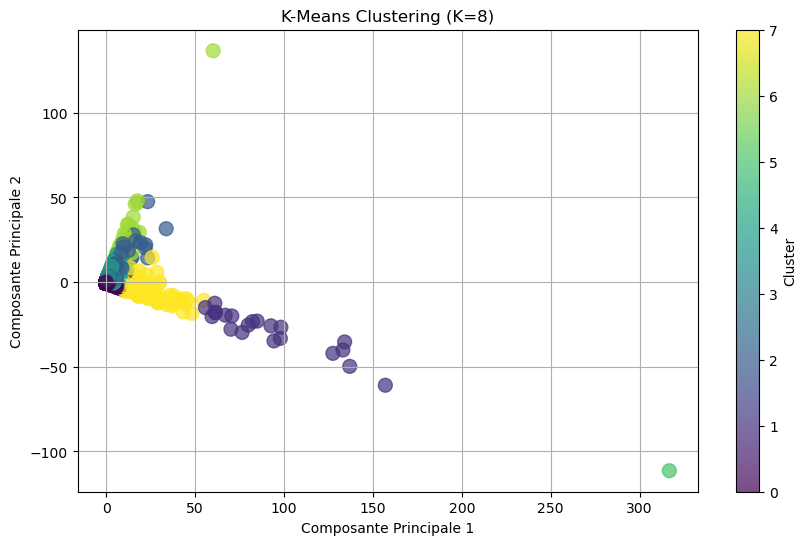

In [24]:
# Suppose you've determined that the optimal number of clusters is 3
optimal_k = 8  # Replace this with the optimal number you found

# Fit K-Means with the optimal number of clusters
kmeans=KMeans(n_clusters=8)


# Visualize the clusters using the first two principal components with plt.scatter
plt.figure(figsize=(10, 6))
plt.scatter(res_ACP[:, 0], res_ACP[:, 1], c=df['kmeans_3'], cmap='viridis', s=100, alpha=0.7)
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid()
plt.colorbar(label='Cluster')  # Optional: add a color bar to indicate cluster numbers
plt.show()
#changer kmeans3 a ne pas etre une var quanti pour mieux visiualiser

y a un groupe confondue avec un autre donc c est preferable de garder 2 groupe 

In [25]:
# Créer un tableau (DataFrame) regroupant les identifiants par cluster
grouped_clusters = df.groupby('kmeans_3')['author_id'].apply(list).reset_index()

# Renommer les colonnes pour une meilleure clarté
grouped_clusters.columns = ['Cluster', 'author_id']

# Afficher le tableau
print(grouped_clusters)


   Cluster                                          author_id
0        0  [1000000830072815616, 1000000889342644224, 100...
1        1  [13353862, 133663801, 14260960, 16717501, 1839...
2        2  [1002336344, 1010110483582652416, 101058895321...
3        3  [1000039147296448512, 1000047540832784386, 100...
4        4  [1000006771006636032, 1000054742968684551, 100...
5        5                                         [24744541]
6        6  [1014935848222183424, 1083629070, 110992372927...
7        7  [104105131, 105165137, 10681662, 1070877486, 1...


In [26]:
# Créer une liste d'identifiants pour chaque cluster
cluster_1 = df[df['kmeans_3'] == 0]['author_id'].tolist()
cluster_2 = df[df['kmeans_3'] == 1]['author_id'].tolist()
cluster_3 = df[df['kmeans_3'] == 2]['author_id'].tolist()
cluster_4 = df[df['kmeans_3'] == 3]['author_id'].tolist()
cluster_5 = df[df['kmeans_3'] == 4]['author_id'].tolist()
cluster_6 = df[df['kmeans_3'] == 5]['author_id'].tolist()
cluster_7 = df[df['kmeans_3'] == 6]['author_id'].tolist()
cluster_8 = df[df['kmeans_3'] == 7]['author_id'].tolist()

# Trouver le maximum de longueur des clusters
max_len = max(len(cluster_1), len(cluster_2), len(cluster_3))

# Compléter avec des NaN pour avoir le même nombre de lignes dans chaque colonne
cluster_1 += [None] * (max_len - len(cluster_1))
cluster_2 += [None] * (max_len - len(cluster_2))
cluster_3 += [None] * (max_len - len(cluster_3))
cluster_4 += [None] * (max_len - len(cluster_4))
cluster_5 += [None] * (max_len - len(cluster_5))
cluster_6 += [None] * (max_len - len(cluster_6))
cluster_7 += [None] * (max_len - len(cluster_7))
cluster_8 += [None] * (max_len - len(cluster_8))


# Créer un DataFrame avec les identifiants des trois groupes
tableau_clusters = pd.DataFrame({
    'Groupe 1': cluster_1,
    'Groupe 2': cluster_2,
    'Groupe 3': cluster_3,
    'Groupe 4': cluster_4,
    'Groupe 5': cluster_5,
    'Groupe 6': cluster_6,
    'Groupe 7': cluster_7,
    'Groupe 8': cluster_8
})

# Afficher le tableau
print(tableau_clusters)


                   Groupe 1     Groupe 2      Groupe 3      Groupe 4  \
0       1000000830072815616   13353862.0  1.002336e+09  1.000039e+18   
1       1000000889342644224  133663801.0  1.010110e+18  1.000048e+18   
2       1000002263325335552   14260960.0  1.010589e+18  1.000048e+18   
3       1000002361161592832   16717501.0  1.014443e+18  1.000048e+18   
4       1000002642637094915   18396319.0  1.015386e+09  1.000051e+18   
...                     ...          ...           ...           ...   
204807   999990635582107651          NaN           NaN           NaN   
204808   999994651145883649          NaN           NaN           NaN   
204809   999996501207277568          NaN           NaN           NaN   
204810   999997228726013953          NaN           NaN           NaN   
204811   999999771241799681          NaN           NaN           NaN   

            Groupe 5    Groupe 6      Groupe 7      Groupe 8  
0       1.000007e+18  24744541.0  1.014936e+18  1.041051e+08  
1       1

In [27]:
# Liste des variables dont on veut calculer la moyenne
variables = ['user_followers_count', 'user_following_count', 'user_listed_count', 'user_tweet_count']

# Calculer la moyenne de ces variables pour chaque cluster
moyennes_clusters = df.groupby('kmeans_3')[variables].mean().reset_index()

# Renommer les colonnes pour plus de clarté si besoin
moyennes_clusters.columns = ['Cluster'] + [f'Moyenne {var}' for var in variables]

# Afficher les résultats
print(moyennes_clusters)
#######faire des boxplot pour bien caracteriser les groupe 
########ou faire un diagramme de en radar/araigne

   Cluster  Moyenne user_followers_count  Moyenne user_following_count  \
0        0                  5.612167e+02                    333.515502   
1        1                  2.888804e+06                   1496.666667   
2        2                  7.269641e+03                   2138.611780   
3        3                  3.605076e+03                    777.713755   
4        4                  6.077515e+03                   3910.349376   
5        5                  9.409677e+06                    632.000000   
6        6                  7.697827e+04                  42389.121951   
7        7                  4.403903e+05                   2115.486188   

   Moyenne user_listed_count  Moyenne user_tweet_count  
0                   4.824517               6819.232994  
1                9510.380952             278634.857143  
2                 153.993307             301476.822624  
3                  40.494814              80973.557579  
4                  68.881334              33409.

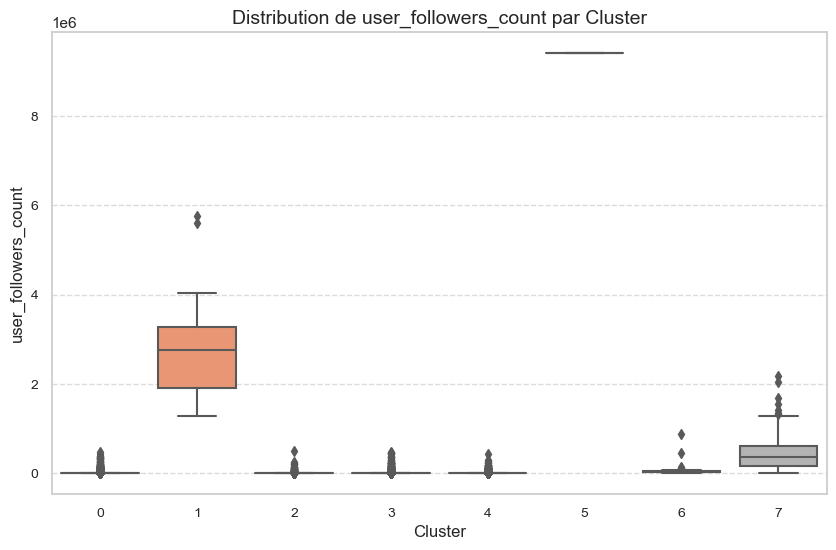

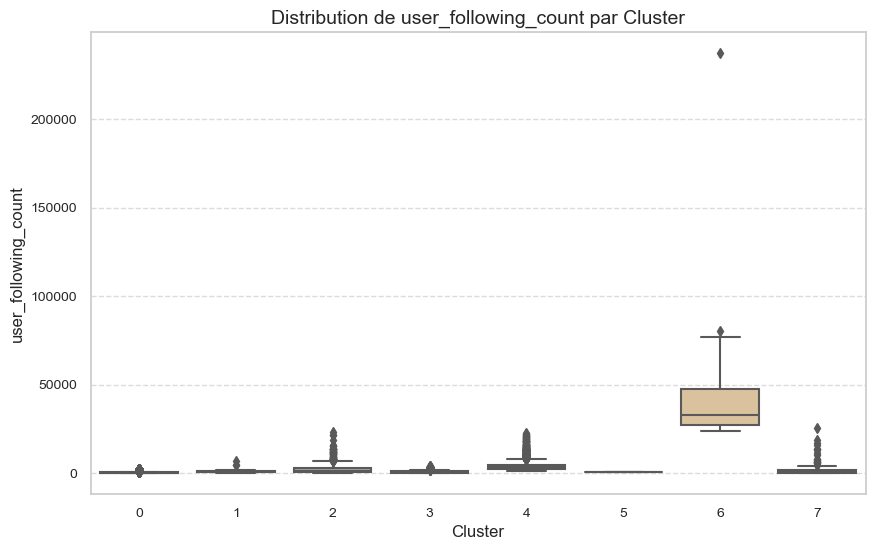

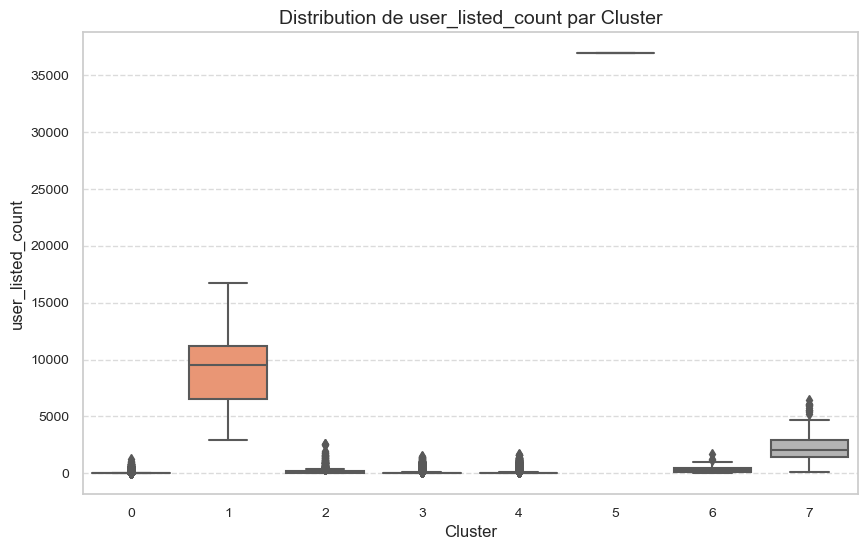

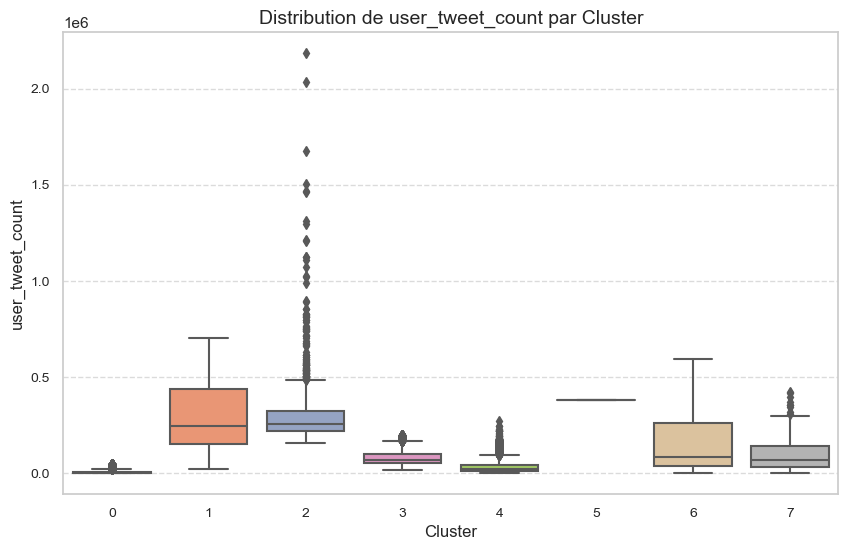

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables d'intérêt
variables = ['user_followers_count', 'user_following_count', 'user_listed_count', 'user_tweet_count']

# Configurer le style pour les graphiques
sns.set(style="whitegrid")

# Créer des boxplots pour chaque variable
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kmeans_3', y=var, data=df, palette='Set2')
    plt.title(f'Distribution de {var} par Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Interprétation des graphiques :
### 1. user_followers_count :
Observation globale :
+ Le Cluster 0 a une médiane beaucoup plus élevée, indiquant que ce groupe contient des utilisateurs avec un nombre de followers très important.
+ Les outliers dans plusieurs clusters (notamment 6 et 7) représentent quelques utilisateurs exceptionnels ayant un nombre anormalement élevé de followers.
##### Conclusion potentielle :
Le Cluster 0 semble regrouper des "influenceurs" ou comptes très suivis, tandis que d'autres clusters regroupent des utilisateurs avec moins d'impact social.
### 2. user_following_count :
Observation globale :
+ Le Cluster 6 contient des utilisateurs qui suivent un grand nombre d'autres comptes (médiane plus élevée que les autres clusters).
+ Le Cluster 0 a une médiane plus basse, ce qui suggère que les utilisateurs suivis (followers) ne suivent pas beaucoup d'autres comptes.
##### Conclusion potentielle :
Le Cluster 6 peut représenter des comptes très actifs dans le suivi d'autres utilisateurs (comportement de "follower").
Le Cluster 0 correspond encore une fois aux influenceurs ou comptes prestigieux qui suivent peu.
### 3. user_listed_count :
Observation globale :
+ Le Cluster 0 a une médiane très élevée, ce qui signifie que ces utilisateurs sont souvent listés par d'autres (par exemple dans des listes Twitter).
##### Conclusion potentielle :
Être listé est souvent associé à une reconnaissance ou importance spécifique. Le Cluster 0 regroupe des comptes professionnels ou spécialisés.
### 4. user_tweet_count :
Observation globale :
+ Le Cluster 2 a une distribution avec de nombreux outliers vers des comptes ayant un grand nombre de tweets, bien que la médiane reste modérée.
+ Le Cluster 7 a une médiane élevée, ce qui suggère des utilisateurs très actifs en termes de publication.
##### Conclusion potentielle :
Le Cluster 7 pourrait représenter des utilisateurs très actifs, comme des blogueurs ou comptes de médias.
Le Cluster 2 a une large variation, ce qui pourrait refléter une activité diversifiée.


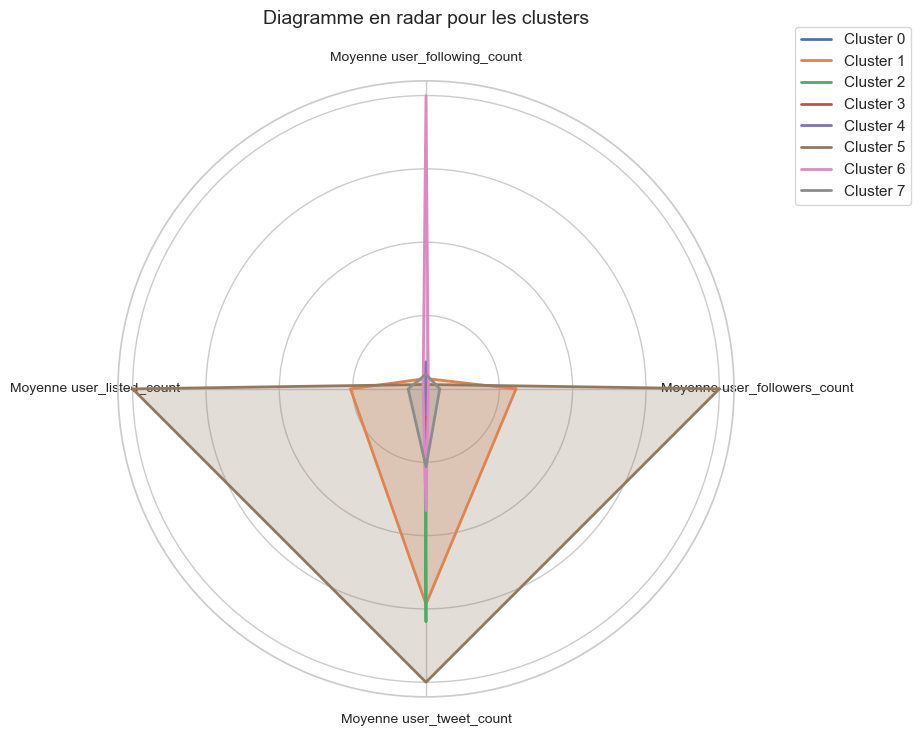

In [29]:



# Normalisation des valeurs pour un meilleur affichage (optionnel)
moyennes_clusters_normalized = moyennes_clusters.copy()
for col in moyennes_clusters.columns[1:]:
    moyennes_clusters_normalized[col] = moyennes_clusters[col] / moyennes_clusters[col].max()

# Paramètres du diagramme
categories = [f'Moyenne {var}' for var in variables]
clusters = moyennes_clusters_normalized['Cluster']

# Ajouter le premier point pour fermer le cercle
values = moyennes_clusters_normalized.iloc[:, 1:].values
values = np.concatenate([values, values[:, :1]], axis=1)  # Boucler les valeurs pour le cercle complet
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Boucler les angles

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, cluster_values in enumerate(values):
    ax.plot(angles, cluster_values, label=f'Cluster {clusters[i]}', linewidth=2)
    ax.fill(angles, cluster_values, alpha=0.25)

# Ajouter des étiquettes aux axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([])  # Désactiver les étiquettes des rayons (optionnel)

# Légendes et titre
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Diagramme en radar pour les clusters', fontsize=14, pad=20)
plt.show()


### Cluster 0 (bleu clair) :
Ce cluster se distingue sur l'axe user_tweet_count, où il semble avoir les plus faibles valeurs.
Interprétation :
Les utilisateurs de ce groupe publient peu de tweets.

### Cluster 1 (orange) :
Montre une domination relative sur plusieurs axes, notamment user_following_count et user_listed_count.
Interprétation :
Ce cluster regroupe des utilisateurs qui :
Suivent beaucoup d’autres comptes.
Sont plus fréquemment ajoutés dans des listes indiquant une certaine influence ou pertinence thématique

### Cluster 2 (vert) :
Se concentre sur des valeurs faibles dans toutes les dimensions, avec une pointe légèrement plus basse en user_following_count.
Interprétation :
Ce groupe regroupe des utilisateurs peu actifs ou moins connectés à la communauté.
Ce pourrait être des nouveaux utilisateurs, ou ceux avec une présence limitée.

### Clusters 3 à 7 (autres couleurs) :
Ces clusters ont des tailles et des formes globalement similaires :
Les différences entre eux ne sont pas très marquées visuellement. 
Interprétation :
Ces groupes peuvent représenter des utilisateurs aux comportements relativement homogènes, avec des variations faibles entre les variables.

In [30]:
# Calculer l'écart type de ces variables pour chaque cluster
ecartype_clusters = df.groupby('kmeans_3')[variables].std().reset_index()

# Renommer les colonnes pour plus de clarté
ecartype_clusters.columns = ['Cluster'] + [f'Écart type {var}' for var in variables]

# Afficher les résultats
print(ecartype_clusters)

   Cluster  Écart type user_followers_count  Écart type user_following_count  \
0        0                     4.862261e+03                       377.084550   
1        1                     1.212027e+06                      1706.401018   
2        2                     2.229088e+04                      2632.597039   
3        3                     1.704677e+04                       616.624690   
4        4                     1.561105e+04                      2057.927910   
5        5                              NaN                              NaN   
6        6                     1.442953e+05                     34237.918497   
7        7                     3.918559e+05                      3613.404800   

   Écart type user_listed_count  Écart type user_tweet_count  
0                     24.552608                  9292.589863  
1                   3978.669319                183489.329266  
2                    259.634000                159632.386054  
3                     98.12

In [31]:
df_mean = ['tweet_like_count_mean','tweet_quote_count_mean','tweet_reply_count_mean','tweet_retweet_count_mean','tweet_length_mean','Mention_count_mean',
          'Hashtag_count_mean','time_between_tweet_tweetos_mean', 'time_between_tweet_start_mean',]
nouveau_df1 = df[df_mean]
nouveau_df1.head()

,tweet_like_count_mean,tweet_quote_count_mean,tweet_reply_count_mean,tweet_retweet_count_mean,tweet_length_mean,Mention_count_mean,Hashtag_count_mean,time_between_tweet_tweetos_mean,time_between_tweet_start_mean
0,1.0,0.0,0.500000,0.0,68.000000,0.000000,0.0,1152 days 13:50:18.500000,9 days 02:59:29.500000
1,0.0,0.0,0.333333,0.0,39.666667,0.333333,0.0,1150 days 01:51:40,6 days 15:01:05
2,2.0,0.5,1.500000,0.0,129.000000,0.000000,0.0,1154 days 03:14:01,10 days 16:28:54
3,1.0,0.0,0.000000,2.0,65.000000,0.000000,0.0,1166 days 01:50:34,22 days 15:05:50
4,2.5,0.0,0.000000,0.0,83.500000,0.500000,0.0,1144 days 16:34:25,1 days 05:50:48


In [32]:
nouveau_df1['time_between_tweet_tweetos_mean'] = pd.to_timedelta(nouveau_df1['time_between_tweet_tweetos_mean'])
# Transformer la durée en secondes

nouveau_df1['time_between_tweet_tweetos_mean_seconds'] = nouveau_df1['time_between_tweet_tweetos_mean'].dt.total_seconds()

print(nouveau_df1)

        tweet_like_count_mean  tweet_quote_count_mean  tweet_reply_count_mean  \
0                    1.000000                0.000000                0.500000   
1                    0.000000                0.000000                0.333333   
2                    2.000000                0.500000                1.500000   
3                    1.000000                0.000000                0.000000   
4                    2.500000                0.000000                0.000000   
...                       ...                     ...                     ...   
231367               1.000000                0.000000                1.000000   
231368               0.000000                0.000000                1.333333   
231369               0.500000                0.000000                0.500000   
231370               5.090909                0.090909                1.090909   
231371               3.500000                0.000000                0.500000   

        tweet_retweet_count

C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\3279721854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_df1['time_between_tweet_tweetos_mean'] = pd.to_timedelta(nouveau_df1['time_between_tweet_tweetos_mean'])
C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\3279721854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_df1['time_between_tweet_tweetos_mean_seconds'] = nouveau_df1['time_between_tweet_tweetos_mean'].dt.total_seconds()


In [33]:
nouveau_df1['time_between_tweet_tweetos_mean'] = nouveau_df1['time_between_tweet_tweetos_mean_seconds']
print(nouveau_df1)

        tweet_like_count_mean  tweet_quote_count_mean  tweet_reply_count_mean  \
0                    1.000000                0.000000                0.500000   
1                    0.000000                0.000000                0.333333   
2                    2.000000                0.500000                1.500000   
3                    1.000000                0.000000                0.000000   
4                    2.500000                0.000000                0.000000   
...                       ...                     ...                     ...   
231367               1.000000                0.000000                1.000000   
231368               0.000000                0.000000                1.333333   
231369               0.500000                0.000000                0.500000   
231370               5.090909                0.090909                1.090909   
231371               3.500000                0.000000                0.500000   

        tweet_retweet_count

C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\3446295904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_df1['time_between_tweet_tweetos_mean'] = nouveau_df1['time_between_tweet_tweetos_mean_seconds']


In [34]:
nouveau_df1['time_between_tweet_start_mean'] = pd.to_timedelta(nouveau_df1['time_between_tweet_start_mean'])
# Transformer la durée en secondes

nouveau_df1['time_between_tweet_start_mean_second'] = nouveau_df1['time_between_tweet_start_mean'].dt.total_seconds()
nouveau_df1['time_between_tweet_start_mean'] = nouveau_df1['time_between_tweet_start_mean_second']
print(nouveau_df1)

        tweet_like_count_mean  tweet_quote_count_mean  tweet_reply_count_mean  \
0                    1.000000                0.000000                0.500000   
1                    0.000000                0.000000                0.333333   
2                    2.000000                0.500000                1.500000   
3                    1.000000                0.000000                0.000000   
4                    2.500000                0.000000                0.000000   
...                       ...                     ...                     ...   
231367               1.000000                0.000000                1.000000   
231368               0.000000                0.000000                1.333333   
231369               0.500000                0.000000                0.500000   
231370               5.090909                0.090909                1.090909   
231371               3.500000                0.000000                0.500000   

        tweet_retweet_count

C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\2666770559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_df1['time_between_tweet_start_mean'] = pd.to_timedelta(nouveau_df1['time_between_tweet_start_mean'])
C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\2666770559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_df1['time_between_tweet_start_mean_second'] = nouveau_df1['time_between_tweet_start_mean'].dt.total_seconds()
C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\266677055

In [35]:
nouveau_df_mean = ['tweet_like_count_mean','tweet_quote_count_mean','tweet_reply_count_mean','tweet_retweet_count_mean','tweet_length_mean','Mention_count_mean',
          'Hashtag_count_mean','time_between_tweet_tweetos_mean_seconds','time_between_tweet_start_mean_second' ]
moy_df = nouveau_df1[nouveau_df_mean]
print(moy_df)

        tweet_like_count_mean  tweet_quote_count_mean  tweet_reply_count_mean  \
0                    1.000000                0.000000                0.500000   
1                    0.000000                0.000000                0.333333   
2                    2.000000                0.500000                1.500000   
3                    1.000000                0.000000                0.000000   
4                    2.500000                0.000000                0.000000   
...                       ...                     ...                     ...   
231367               1.000000                0.000000                1.000000   
231368               0.000000                0.000000                1.333333   
231369               0.500000                0.000000                0.500000   
231370               5.090909                0.090909                1.090909   
231371               3.500000                0.000000                0.500000   

        tweet_retweet_count

In [36]:
# Initialiser le scaler
scaler = StandardScaler()

# Normaliser et réduire les données
moy_df_normalized = scaler.fit_transform(moy_df)

# Convertir le tableau normalisé en DataFrame
moy_normalized = pd.DataFrame(moy_df_normalized, columns=nouveau_df_mean )

# Afficher les premières lignes du DataFrame normalisé
print(moy_normalized.head())

   tweet_like_count_mean  tweet_quote_count_mean  tweet_reply_count_mean  \
0              -0.028239               -0.036313               -0.058588   
1              -0.032196               -0.036313               -0.081892   
2              -0.024281                0.075968                0.081239   
3              -0.028239               -0.036313               -0.128501   
4              -0.022303               -0.036313               -0.128501   

   tweet_retweet_count_mean  tweet_length_mean  Mention_count_mean  \
0                 -0.030946          -1.021609           -0.913196   
1                 -0.030946          -1.428884           -0.652060   
2                 -0.030946          -0.144769           -0.913196   
3                  0.003992          -1.064732           -0.913196   
4                 -0.030946          -0.798805           -0.521492   

   Hashtag_count_mean  time_between_tweet_tweetos_mean_seconds  \
0           -0.245669                                -0.

In [37]:
ecart_types1 = moy_df.apply(lambda x: x.std(), axis=0)

print(ecart_types1)

tweet_like_count_mean                      2.526922e+02
tweet_quote_count_mean                     4.453086e+00
tweet_reply_count_mean                     7.151722e+00
tweet_retweet_count_mean                   5.724374e+01
tweet_length_mean                          6.956813e+01
Mention_count_mean                         1.276475e+00
Hashtag_count_mean                         8.309519e-01
time_between_tweet_tweetos_mean_seconds    1.163057e+08
time_between_tweet_start_mean_second       7.180759e+05
dtype: float64


In [38]:
matrice_correlation1 = moy_df[nouveau_df_mean].corr()
print(matrice_correlation1)

                                         tweet_like_count_mean  \
tweet_like_count_mean                                 1.000000   
tweet_quote_count_mean                                0.540221   
tweet_reply_count_mean                                0.318331   
tweet_retweet_count_mean                              0.891829   
tweet_length_mean                                     0.002177   
Mention_count_mean                                   -0.017690   
Hashtag_count_mean                                    0.002118   
time_between_tweet_tweetos_mean_seconds               0.006739   
time_between_tweet_start_mean_second                 -0.008406   

                                         tweet_quote_count_mean  \
tweet_like_count_mean                                  0.540221   
tweet_quote_count_mean                                 1.000000   
tweet_reply_count_mean                                 0.448824   
tweet_retweet_count_mean                               0.599362   
twee

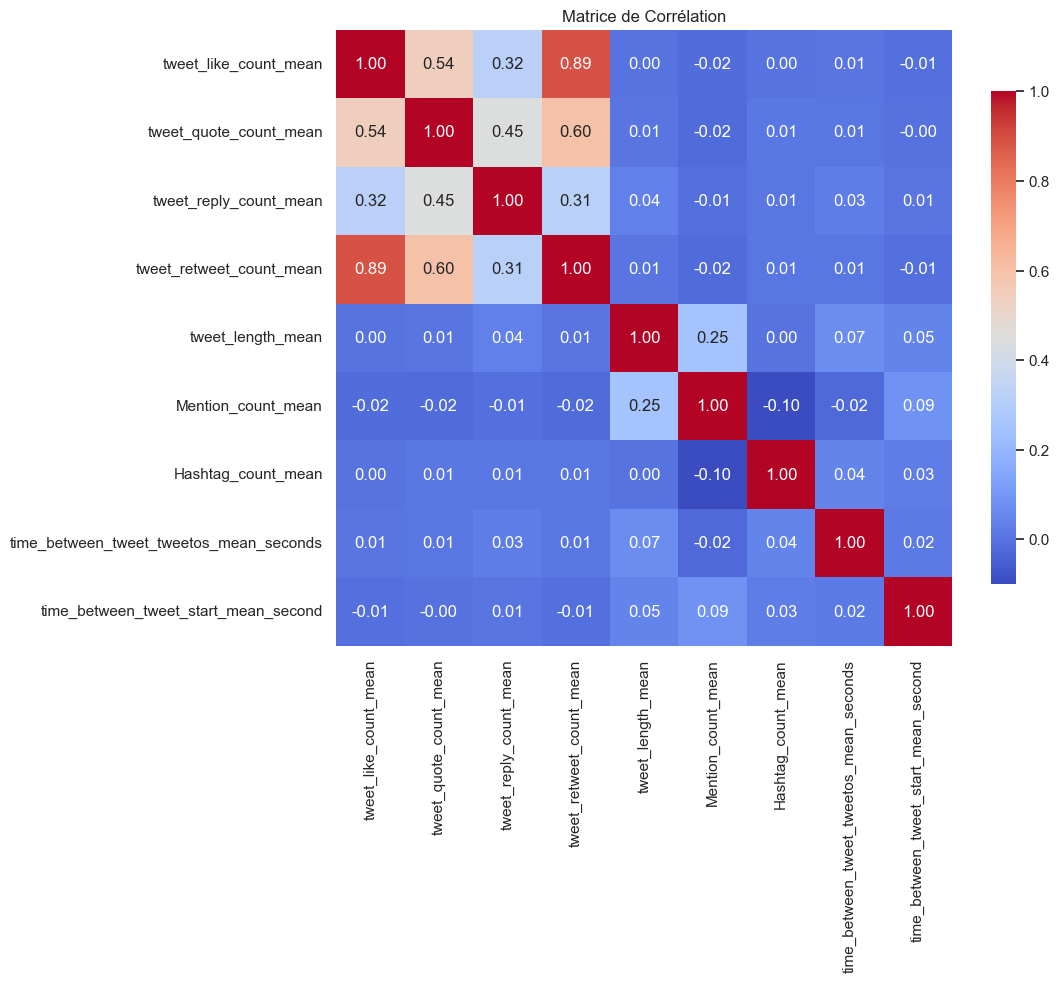

In [39]:
matcor = moy_df.corr()
# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matcor, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, 
            xticklabels=moy_df.columns, yticklabels=moy_df.columns)
plt.title('Matrice de Corrélation')
plt.show()

Explained variance ratio: [0.28937919 0.14423103 0.12002907 0.10972968 0.10265035 0.0927124
 0.07905901 0.05064952 0.01155976]


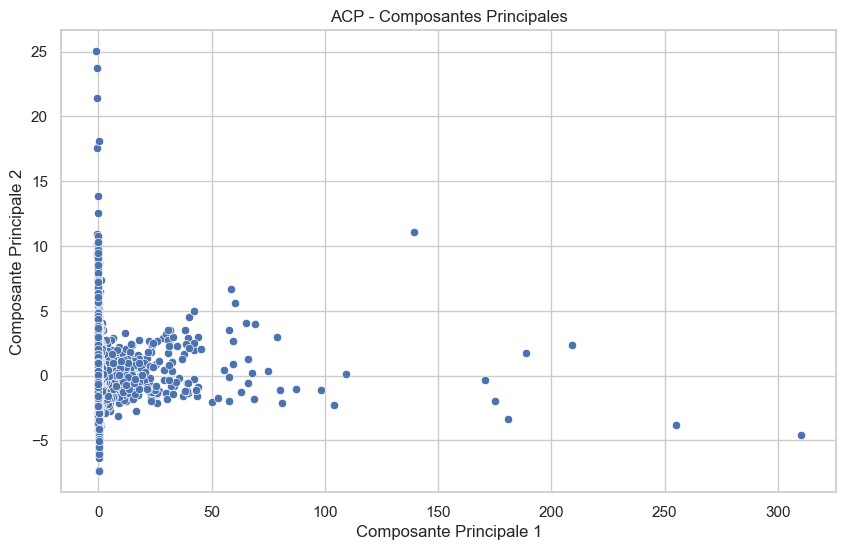

In [40]:
# Initialiser l'ACP
pca1 = PCA(n_components=9)

# Effectuer l'ACP
res_ACP1 = pca1.fit_transform(moy_df_normalized)

# Afficher un résumé des résultats
print(f"Explained variance ratio: {pca1.explained_variance_ratio_}")

# Visualiser les résultats de l'ACP
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Ajouter Seaborn style pour la mise en forme
sns.scatterplot(x=res_ACP1[:, 0], y=res_ACP1[:, 1])
plt.title("ACP - Composantes Principales")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid(True)
plt.show()

In [41]:
# Initialiser PCA avec le nombre de composantes souhaité
nbre_composantes = min(moy_df_normalized.shape)  # Utilise le nombre de lignes ou de colonnes
pca1 = PCA(n_components=nbre_composantes)

# Adapter le modèle et transformer les données
X_CR = pca1.fit_transform(moy_df_normalized)

# Afficher les résultats
print("Données transformées :")
print(X_CR)

# Afficher les valeurs propres
print("Valeurs propres :")
print(pca1.explained_variance_)

# Afficher le ratio de variance expliquée par chaque composante
print("Variance expliquée par composante :")
print(pca1.explained_variance_ratio_)

Données transformées :
[[-7.20216201e-02 -1.36780886e+00 -5.46822286e-01 ... -7.83667210e-02
  -1.32201410e-02 -3.63440207e-03]
 [-9.09268687e-02 -1.53985300e+00 -7.47016973e-01 ...  4.03251194e-01
  -9.12711458e-03 -8.22118793e-03]
 [ 4.47223355e-02 -7.43833998e-01 -3.35615913e-01 ... -6.45400013e-01
   3.76942393e-02  9.31993135e-03]
 ...
 [ 4.02208941e-03 -2.36120604e+00  5.35400052e+00 ...  2.01350420e+00
  -9.39858309e-02  2.72230697e-02]
 [-1.73413760e-02 -6.62117056e-01 -7.34547127e-01 ... -1.12532811e-01
  -1.88592948e-02  4.47498542e-03]
 [-6.02002967e-02 -1.58583659e+00 -7.93480403e-01 ... -2.28261421e-04
  -1.37195930e-02  2.49555636e-03]]
Valeurs propres :
[2.60442394 1.29808486 1.08026628 0.98757141 0.9238571  0.83441523
 0.71153417 0.45584762 0.10403829]
Variance expliquée par composante :
[0.28937919 0.14423103 0.12002907 0.10972968 0.10265035 0.0927124
 0.07905901 0.05064952 0.01155976]


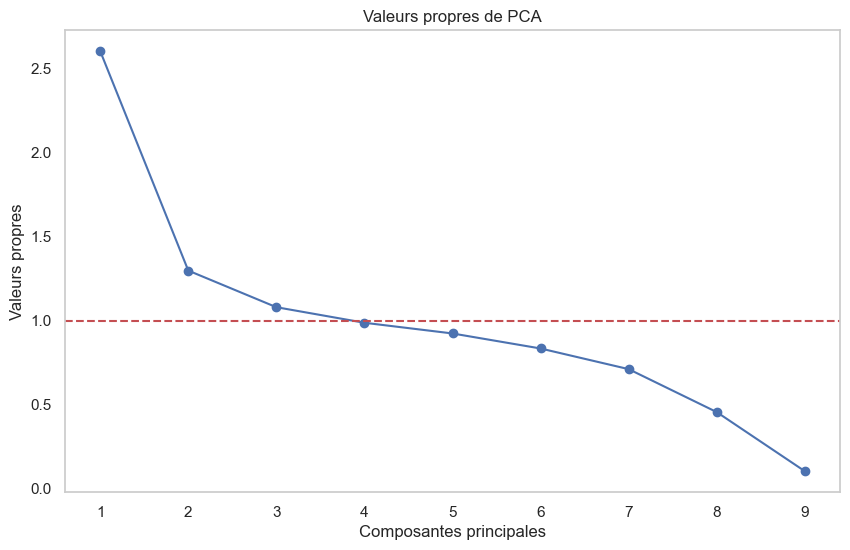

In [42]:
# Récupérer les valeurs propres
eigenvalues = pca1.explained_variance_

# Tracer les valeurs propres
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axhline(y=1, color='r', linestyle='--')  # Ligne horizontale à h = 1
plt.title("Valeurs propres de PCA")
plt.xlabel("Composantes principales")
plt.ylabel("Valeurs propres")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()

In [43]:
# Extraire les composantes principales
components = pca1.components_.T
# Si moy_df_normalized est déjà un DataFrame
if isinstance(moy_df_normalized, np.ndarray):
    # Si c'est un tableau numpy, le convertir en DataFrame
    moy_df_normalized = pd.DataFrame(moy_df_normalized, columns=[f'Var{i+1}' for i in range(moy_df_normalized.shape[1])])

# Calculer la corrélation entre les variables d'origine et les composantes principales
correlations = np.corrcoef(moy_df_normalized.T, pca1.transform(moy_df_normalized).T)[:len(moy_df_normalized.columns), len(moy_df_normalized.columns):]

# Convertir en DataFrame pour un affichage propre
corr_df = pd.DataFrame(correlations, columns=[f'PC{i+1}' for i in range(components.shape[1])], index=moy_df_normalized.columns)

# Affichage des corrélations pour les axes 1 à 3
print(corr_df.iloc[:, :3])

           PC1       PC2       PC3
Var1  0.891337 -0.010712 -0.051726
Var2  0.802845  0.002558  0.006620
Var3  0.579838  0.057867  0.077069
Var4  0.909202 -0.009442 -0.044551
Var5  0.017382  0.730667  0.178082
Var6 -0.034192  0.773148 -0.194071
Var7  0.017466 -0.208715  0.697694
Var8  0.025716  0.106260  0.662574
Var9 -0.008602  0.328686  0.272872


C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


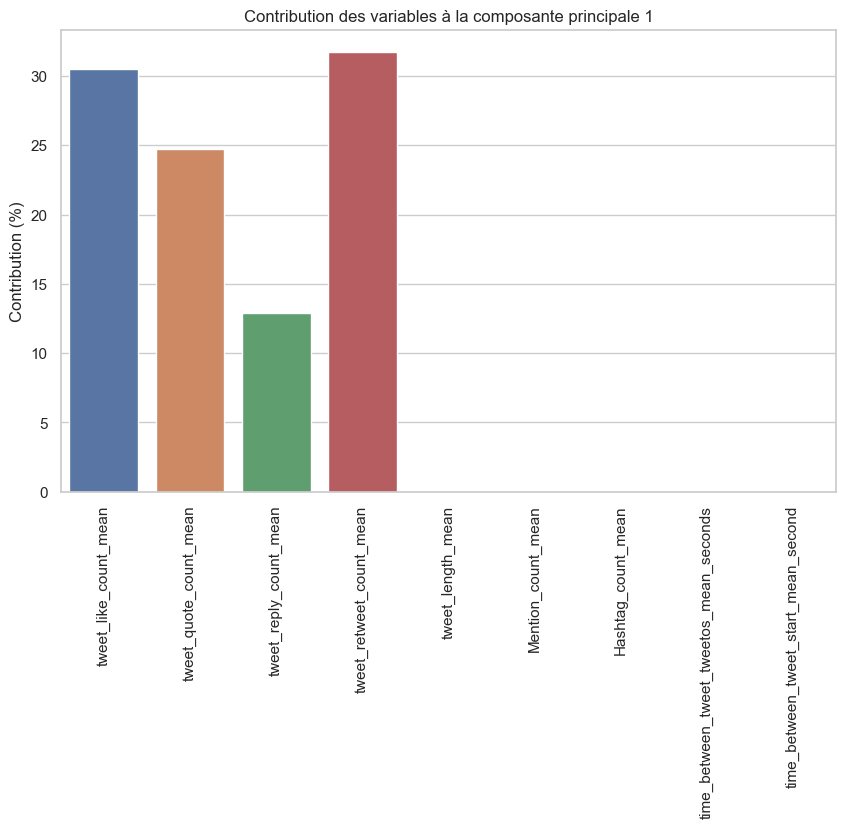

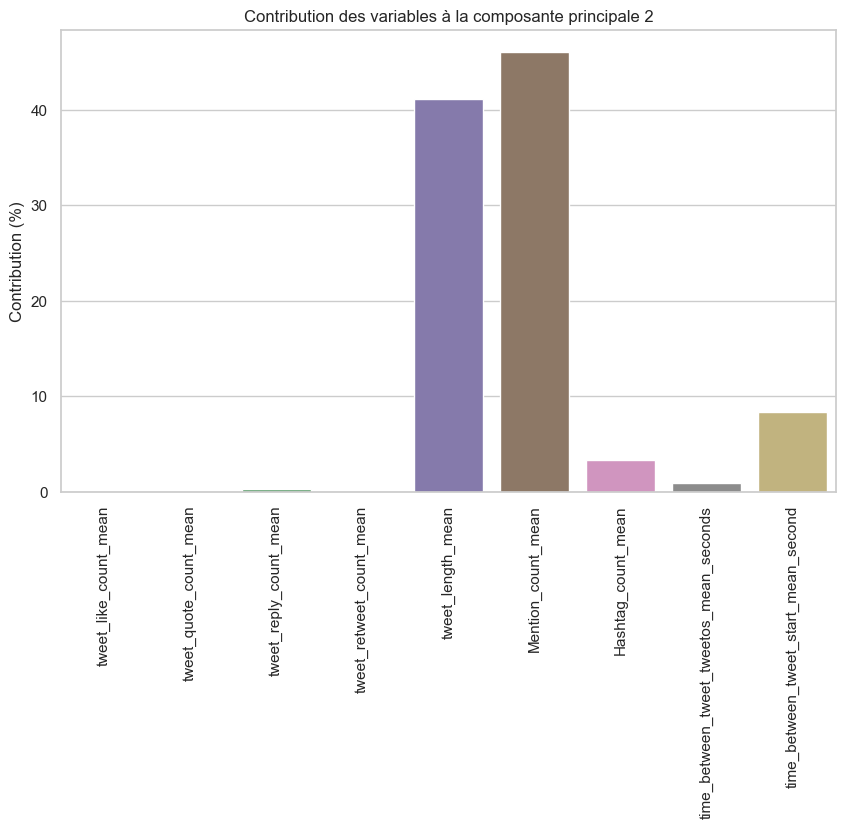

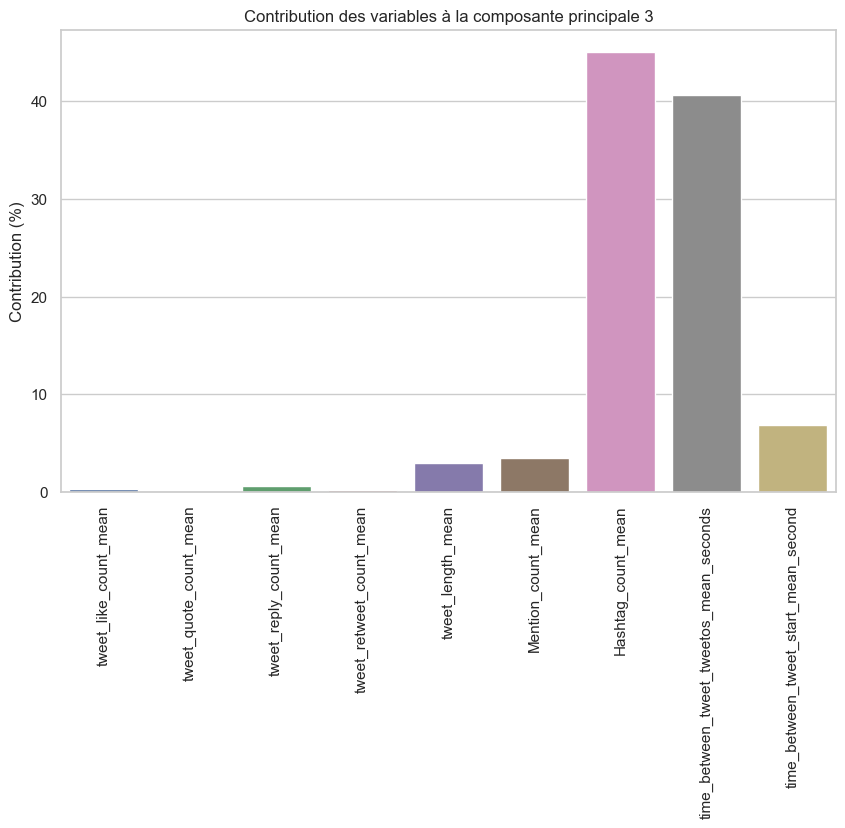

In [44]:
#  Calculer les contributions des variables aux axes
# Le calcul de la contribution est donné par : (coordonnées^2 / somme des coordonnées^2) * 100
var_contrib = np.square(pca1.components_) * 100 / np.sum(np.square(pca1.components_), axis=1, keepdims=True)

# Transformer en DataFrame pour un affichage plus simple
contrib_df = pd.DataFrame(var_contrib.T, columns=[f'PC{i+1}' for i in range(pca1.n_components_)], index=nouveau_df_mean )

#  Fonction pour afficher les contributions
def plot_contrib(contrib_df, axe):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=contrib_df.index, y=contrib_df[f'PC{axe}'])
    plt.xticks(rotation=90)
    plt.title(f'Contribution des variables à la composante principale {axe}')
    plt.ylabel('Contribution (%)')
    plt.show()

#  Afficher les contributions pour les axes 1, 2 et 3
plot_contrib(contrib_df, 1)  # Contributions à l'axe 1
plot_contrib(contrib_df, 2)  # Contributions à l'axe 2
plot_contrib(contrib_df, 3)  # Contributions à l'axe 1

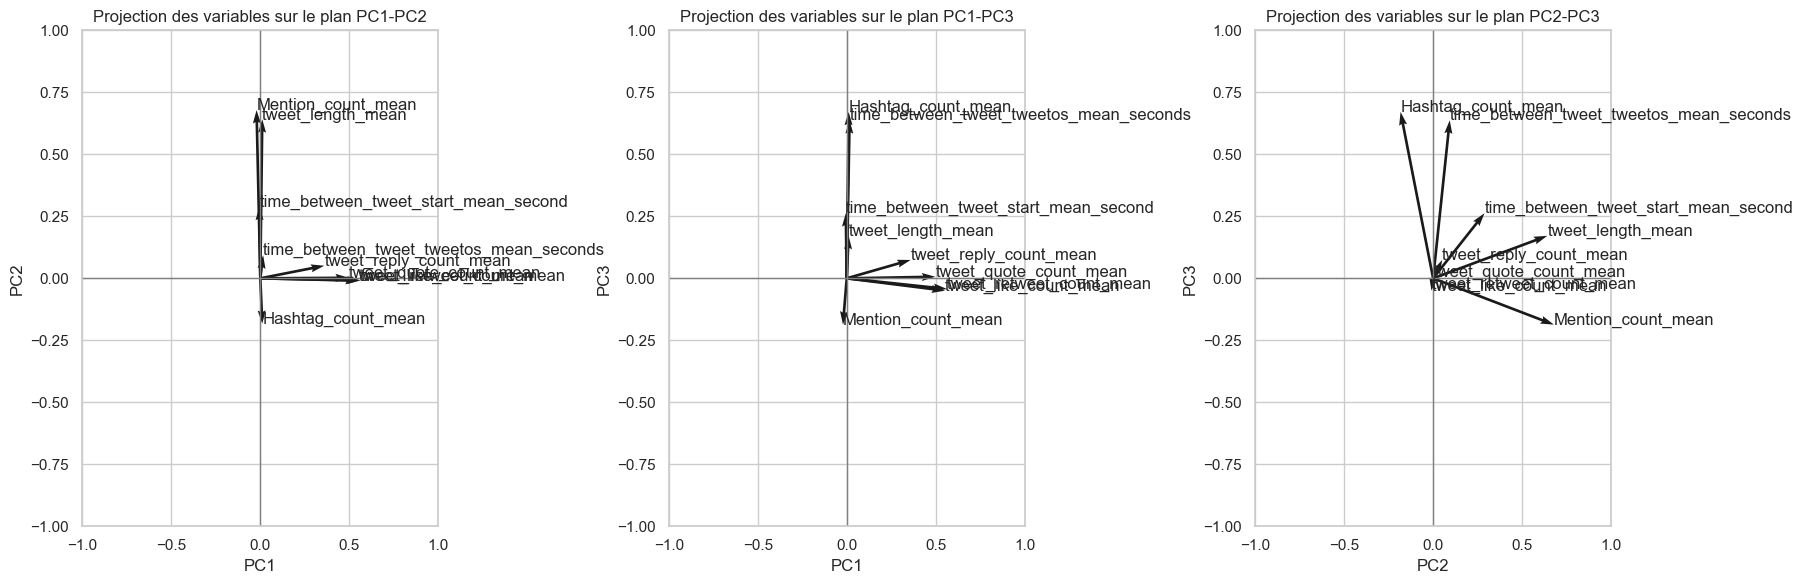

In [45]:
import matplotlib.pyplot as plt

# Calcul des loadings (déjà fait)
loadings = pca1.components_.T

# Définir les combinaisons de paires de composants pour les graphes 2D
composantes = [(0, 1), (0, 2), (1, 2)]
labels = [("PC1", "PC2"), ("PC1", "PC3"), ("PC2", "PC3")]

# Créer une figure avec trois sous-graphiques pour chaque paire
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tracer chaque paire de composantes principales
for i, (x_idx, y_idx) in enumerate(composantes):
    ax = axes[i]
    
    # Tracer les vecteurs pour les deux composantes sélectionnées
    ax.quiver([0]*loadings.shape[0], [0]*loadings.shape[0], 
              loadings[:, x_idx], loadings[:, y_idx], angles='xy', scale_units='xy', scale=1)
    
    # Ajouter le nom des variables aux extrémités des vecteurs
    for j, var in enumerate(moy_df.columns):
        ax.text(loadings[j, x_idx], loadings[j, y_idx], var)
    
    # Définir les limites des axes
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    
    # Ajouter des lignes centrales pour chaque axe
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    
    # Ajouter des labels et un titre pour chaque sous-graphique
    ax.set_xlabel(labels[i][0])
    ax.set_ylabel(labels[i][1])
    ax.set_title(f"Projection des variables sur le plan {labels[i][0]}-{labels[i][1]}")

# Afficher la grille et les graphiques
plt.tight_layout()
plt.show()


In [46]:
# Calcul des cos² (qualité de projection) pour chaque individu sur chaque axe
cos2 = (res_ACP1**2) / np.sum(res_ACP1**2, axis=1, keepdims=True)

# Etape 2 : Trouver les points mal projetés pour chaque axe (cos² < 0.2)
for i in range(3):  # pour les axes 1 à 3
    print(f"Points mal projetés sur l'axe {i+1}:")
    
    # Filtrage des points avec cos² < 0.2
    mal_proj = cos2[:, i] < 0.2
    print(f"Indices des points mal projetés : {np.where(mal_proj)[0]}")
    
    # Optionnel : affichage des cos² des points mal projetés
    print(f"Valeurs cos² : {cos2[mal_proj, i]}")
    
    

Points mal projetés sur l'axe 1:
Indices des points mal projetés : [     0      1      2 ... 231369 231370 231371]
Valeurs cos² : [2.29876621e-03 2.63732393e-03 1.73247291e-03 ... 2.32309930e-07
 1.57754482e-04 9.85228019e-04]
Points mal projetés sur l'axe 2:
Indices des points mal projetés : [     5     12     13 ... 231365 231367 231369]
Valeurs cos² : [0.0621776  0.04943761 0.00997119 ... 0.00102265 0.12548665 0.08006304]
Points mal projetés sur l'axe 3:
Indices des points mal projetés : [     0      1      2 ... 231366 231368 231371]
Valeurs cos² : [0.1325139  0.17800817 0.09756692 ... 0.12510194 0.15960157 0.17116379]


In [47]:
#forte contrib
for i in range(3):
    print(f"Points ayant une forte contribution sur l'axe {i+1}:")
    
    # Calcul de la contribution sur l'axe i (comme en R)
    coord = res_ACP1[:, i]  # Coordonnées des points sur l'axe i
    contrib = (coord**2 / np.sum(coord**2)) * 100  # Contribution en %

    # Sélection des points ayant une forte contribution (contribution > sqrt(valeur propre))
    threshold = np.sqrt(pca1.explained_variance_[i])
    high_contrib = np.abs(coord) > threshold

    # Création d'un DataFrame pour les contributions
    val = pd.DataFrame({'contribution': contrib[high_contrib]})
    print(val)

Points ayant une forte contribution sur l'axe 1:
      contribution
0         0.004791
1         0.002996
2         0.001974
3         0.025582
4         0.000519
...            ...
1229      0.000775
1230      0.000526
1231      0.000634
1232      0.000741
1233      0.003139

[1234 rows x 1 columns]
Points ayant une forte contribution sur l'axe 2:
       contribution
0          0.000623
1          0.000789
2          0.000509
3          0.001053
4          0.000862
...             ...
75535      0.000565
75536      0.000969
75537      0.000548
75538      0.001856
75539      0.000837

[75540 rows x 1 columns]
Points ayant une forte contribution sur l'axe 3:
       contribution
0          0.000725
1          0.001049
2          0.000760
3          0.000503
4          0.000681
...             ...
50403      0.000740
50404      0.001207
50405      0.000443
50406      0.000759
50407      0.011469

[50408 rows x 1 columns]


C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

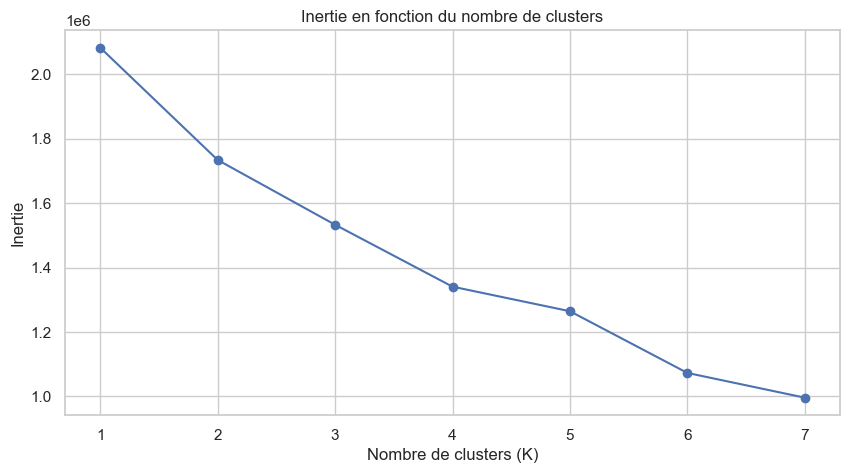

In [48]:
optimise_k_means(moy_df_normalized,8)

In [49]:
kmeans1=KMeans(n_clusters=8)

In [50]:
kmeans1.fit(moy_df_normalized)

C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [51]:
df['kmeans_2']=kmeans1.labels_

In [54]:
df['time_between_tweet_tweetos_mean'] = pd.to_timedelta(df['time_between_tweet_tweetos_mean'])
# Transformer la durée en secondes

df['time_between_tweet_tweetos_mean_seconds'] = df['time_between_tweet_tweetos_mean'].dt.total_seconds()
df['time_between_tweet_start_mean'] = pd.to_timedelta(df['time_between_tweet_start_mean'])
# Transformer la durée en secondes

df['time_between_tweet_start_mean_second'] = df['time_between_tweet_start_mean'].dt.total_seconds()
print(df.columns)

Index(['author_id', '_id', 'conversation_id', 'id', 'in_reply_to_user_id',
       'referenced_tweets', 'reply_settings', 'source_count',
       'Numbers_of_tweet', 'tweet_like_count_sum', 'tweet_like_count_mean',
       'tweet_like_count_std', 'tweet_like_count_min', 'tweet_like_count_Q1',
       'tweet_like_count_median', 'tweet_like_count_Q3',
       'tweet_like_count_max', 'tweet_quote_count_sum',
       'tweet_quote_count_mean', 'tweet_quote_count_std',
       'tweet_quote_count_min', 'tweet_quote_count_Q1',
       'tweet_quote_count_median', 'tweet_quote_count_Q3',
       'tweet_quote_count_max', 'tweet_reply_count_sum',
       'tweet_reply_count_mean', 'tweet_reply_count_std',
       'tweet_reply_count_min', 'tweet_reply_count_Q1',
       'tweet_reply_count_median', 'tweet_reply_count_Q3',
       'tweet_reply_count_max', 'tweet_retweet_count_sum',
       'tweet_retweet_count_mean', 'tweet_retweet_count_std',
       'tweet_retweet_count_min', 'tweet_retweet_count_Q1',
       'twee

In [55]:
variables1 = ['tweet_like_count_mean', 'tweet_quote_count_mean', 'tweet_reply_count_mean',
              'tweet_retweet_count_mean', 'tweet_length_mean', 'Mention_count_mean',
              'Hashtag_count_mean','time_between_tweet_tweetos_mean_seconds','time_between_tweet_start_mean_second']

# Calculer la moyenne pour chaque cluster
moyennes_clusters1 = df.groupby('kmeans_3')[variables1].mean().reset_index()

# Renommer les colonnes pour plus de clarté
moyennes_clusters1.columns = ['Cluster'] + [f'Moyenne {var}' for var in variables1]

# Afficher les résultats
print(moyennes_clusters1)

   Cluster  Moyenne tweet_like_count_mean  Moyenne tweet_quote_count_mean  \
0        0                       6.276097                        0.118241   
1        1                     185.116049                       11.259057   
2        2                      11.795141                        0.270850   
3        3                      24.379208                        0.626736   
4        4                     126.387097                       23.741935   
5        5                      37.397376                        0.791038   
6        6                     694.915576                       13.998591   
7        7                      14.397251                        0.282428   

   Moyenne tweet_reply_count_mean  Moyenne tweet_retweet_count_mean  \
0                        0.806822                          1.285215   
1                       40.939324                         65.005979   
2                        0.869290                          3.643130   
3                     

C:\Users\chikh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikh\AppData\Local\Temp\ipykernel_16700\685622230.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


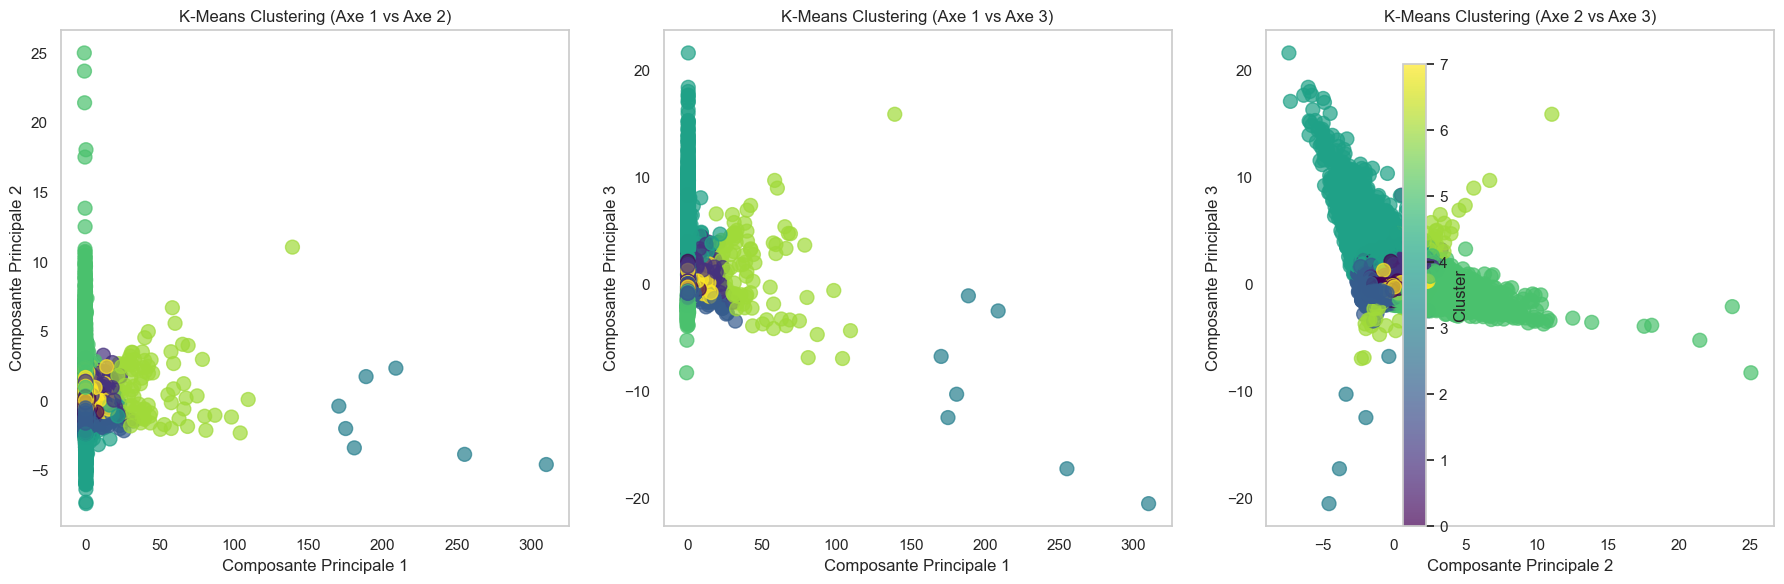

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Nombre optimal de clusters
optimal_k = 8  # Remplacez par la valeur correcte

# Appliquer K-Means sur les résultats de l'ACP
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(res_ACP1)  # res_ACP1 : matrice de l'ACP

# Ajouter les labels des clusters à votre DataFrame
df['kmeans_clusters'] = clusters

# Tracer la CHA entre les différentes paires d'axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CHA entre axe 1 et 2
axes[0].scatter(res_ACP1[:, 0], res_ACP1[:, 1], c=df['kmeans_clusters'], cmap='viridis', s=100, alpha=0.7)
axes[0].set_title(f"K-Means Clustering (Axe 1 vs Axe 2)")
axes[0].set_xlabel("Composante Principale 1")
axes[0].set_ylabel("Composante Principale 2")
axes[0].grid()

# CHA entre axe 1 et 3
axes[1].scatter(res_ACP1[:, 0], res_ACP1[:, 2], c=df['kmeans_clusters'], cmap='viridis', s=100, alpha=0.7)
axes[1].set_title(f"K-Means Clustering (Axe 1 vs Axe 3)")
axes[1].set_xlabel("Composante Principale 1")
axes[1].set_ylabel("Composante Principale 3")
axes[1].grid()

# CHA entre axe 2 et 3
axes[2].scatter(res_ACP1[:, 1], res_ACP1[:, 2], c=df['kmeans_clusters'], cmap='viridis', s=100, alpha=0.7)
axes[2].set_title(f"K-Means Clustering (Axe 2 vs Axe 3)")
axes[2].set_xlabel("Composante Principale 2")
axes[2].set_ylabel("Composante Principale 3")
axes[2].grid()

plt.colorbar(axes[2].collections[0], ax=axes, location="right", label='Cluster')
plt.tight_layout()
plt.show()
#auqli pour lq cqlssificqtion


## Séparation des clusters :

Les clusters 0 et 6 semblent les plus éloignés, ce qui pourrait indiquer qu’ils représentent des groupes distincts avec des caractéristiques uniques.
Les clusters 3, 4, et 5 sont fortement concentrés, ce qui montre qu’ils partagent de nombreuses caractéristiques similaires.

In [56]:
# Cluster pour le graphe Axe 1 vs Axe 2
grouped_clusters_1_2 = df.groupby('kmeans_clusters')['author_id'].apply(list).reset_index()
grouped_clusters_1_2.columns = ['Cluster_1_2', 'author_id']
print("Clusters pour Axe 1 vs Axe 2 :")
print(grouped_clusters_1_2)

# Cluster pour le graphe Axe 1 vs Axe 3
grouped_clusters_1_3 = df.groupby('kmeans_clusters')['author_id'].apply(list).reset_index()
grouped_clusters_1_3.columns = ['Cluster_1_3', 'author_id']
print("\nClusters pour Axe 1 vs Axe 3 :")
print(grouped_clusters_1_3)

# Cluster pour le graphe Axe 2 vs Axe 3
grouped_clusters_2_3 = df.groupby('kmeans_clusters')['author_id'].apply(list).reset_index()
grouped_clusters_2_3.columns = ['Cluster_2_3', 'author_id']
print("\nClusters pour Axe 2 vs Axe 3 :")
print(grouped_clusters_2_3)


Clusters pour Axe 1 vs Axe 2 :
   Cluster_1_2                                          author_id
0            0  [1000002361161592832, 1000003647626010624, 100...
1            1  [1000117680, 1000180070, 1000207656, 100023015...
2            2  [1000000830072815616, 1000000889342644224, 100...
3            3  [1229511182639390720, 1236671866112221187, 123...
4            4  [1000098384877899776, 1000136180544000000, 100...
5            5  [1000021680029347840, 1000023854381764608, 100...
6            6  [1015241106391433216, 1027981724825935872, 103...
7            7  [1000005920372518912, 1000008876945739777, 100...

Clusters pour Axe 1 vs Axe 3 :
   Cluster_1_3                                          author_id
0            0  [1000002361161592832, 1000003647626010624, 100...
1            1  [1000117680, 1000180070, 1000207656, 100023015...
2            2  [1000000830072815616, 1000000889342644224, 100...
3            3  [1229511182639390720, 1236671866112221187, 123...
4            

In [57]:
# Création des clusters pour Axe 1 vs Axe 2
cluster_11_2 = df[df['kmeans_clusters'] == 0]['author_id'].tolist()
cluster_21_2 = df[df['kmeans_clusters'] == 1]['author_id'].tolist()
cluster_31_2 = df[df['kmeans_clusters'] == 2]['author_id'].tolist()
cluster_41_2 = df[df['kmeans_clusters'] == 3]['author_id'].tolist()
cluster_51_2 = df[df['kmeans_clusters'] == 4]['author_id'].tolist()
cluster_61_2 = df[df['kmeans_clusters'] == 5]['author_id'].tolist()
cluster_71_2 = df[df['kmeans_clusters'] == 6]['author_id'].tolist()
cluster_81_2 = df[df['kmeans_clusters'] == 7]['author_id'].tolist()

# Compléter les listes avec NaN pour uniformiser la longueur
max_len_1_2 = max(len(cluster_11_2), len(cluster_21_2), len(cluster_31_2), len(cluster_41_2),
                  len(cluster_51_2), len(cluster_61_2), len(cluster_71_2), len(cluster_81_2))
cluster_11_2 += [None] * (max_len_1_2 - len(cluster_11_2))
cluster_21_2 += [None] * (max_len_1_2 - len(cluster_21_2))
cluster_31_2 += [None] * (max_len_1_2 - len(cluster_31_2))
cluster_41_2 += [None] * (max_len_1_2 - len(cluster_41_2))
cluster_51_2 += [None] * (max_len_1_2 - len(cluster_51_2))
cluster_61_2 += [None] * (max_len_1_2 - len(cluster_61_2))
cluster_71_2 += [None] * (max_len_1_2 - len(cluster_71_2))
cluster_81_2 += [None] * (max_len_1_2 - len(cluster_81_2))

# Création du DataFrame pour Axe 1 vs Axe 2
tableau_clusters_1_2 = pd.DataFrame({
    'Groupe a (1-2)': cluster_11_2,
    'Groupe b (1-2)': cluster_21_2,
    'Groupe c (1-2)': cluster_31_2,
    'Groupe d (1-2)': cluster_41_2,
    'Groupe e (1-2)': cluster_51_2,
    'Groupe f (1-2)': cluster_61_2,
    'Groupe g (1-2)': cluster_71_2,
    'Groupe h (1-2)': cluster_81_2
})

print("\nClusters pour Axe 1 vs Axe 2 :")
print(tableau_clusters_1_2)

# Création des clusters pour Axe 1 vs Axe 3
cluster_11_3 = df[df['kmeans_clusters'] == 0]['author_id'].tolist()
cluster_21_3 = df[df['kmeans_clusters'] == 1]['author_id'].tolist()
cluster_31_3 = df[df['kmeans_clusters'] == 2]['author_id'].tolist()
cluster_41_3 = df[df['kmeans_clusters'] == 3]['author_id'].tolist()
cluster_51_3 = df[df['kmeans_clusters'] == 4]['author_id'].tolist()
cluster_61_3 = df[df['kmeans_clusters'] == 5]['author_id'].tolist()
cluster_71_3 = df[df['kmeans_clusters'] == 6]['author_id'].tolist()
cluster_81_3 = df[df['kmeans_clusters'] == 7]['author_id'].tolist()

# Compléter les listes avec NaN pour uniformiser la longueur
max_len_1_3 = max(len(cluster_11_3), len(cluster_21_3), len(cluster_31_3), len(cluster_41_3),
                  len(cluster_51_3), len(cluster_61_3), len(cluster_71_3), len(cluster_81_3))
cluster_11_3 += [None] * (max_len_1_3 - len(cluster_11_3))
cluster_21_3 += [None] * (max_len_1_3 - len(cluster_21_3))
cluster_31_3 += [None] * (max_len_1_3 - len(cluster_31_3))
cluster_41_3 += [None] * (max_len_1_3 - len(cluster_41_3))
cluster_51_3 += [None] * (max_len_1_3 - len(cluster_51_3))
cluster_61_3 += [None] * (max_len_1_3 - len(cluster_61_3))
cluster_71_3 += [None] * (max_len_1_3 - len(cluster_71_3))
cluster_81_3 += [None] * (max_len_1_3 - len(cluster_81_3))

# Création du DataFrame pour Axe 1 vs Axe 3
tableau_clusters_1_3 = pd.DataFrame({
    'Groupe a (1-3)': cluster_11_3,
    'Groupe b (1-3)': cluster_21_3,
    'Groupe c (1-3)': cluster_31_3,
    'Groupe d (1-3)': cluster_41_3,
    'Groupe e (1-3)': cluster_51_3,
    'Groupe f (1-3)': cluster_61_3,
    'Groupe g (1-3)': cluster_71_3,
    'Groupe h (1-3)': cluster_81_3
})

print("\nClusters pour Axe 1 vs Axe 3 :")
print(tableau_clusters_1_3)

# Création des clusters pour Axe 2 vs Axe 3
cluster_12_3 = df[df['kmeans_clusters'] == 0]['author_id'].tolist()
cluster_22_3 = df[df['kmeans_clusters'] == 1]['author_id'].tolist()
cluster_32_3 = df[df['kmeans_clusters'] == 2]['author_id'].tolist()
cluster_42_3 = df[df['kmeans_clusters'] == 3]['author_id'].tolist()
cluster_52_3 = df[df['kmeans_clusters'] == 4]['author_id'].tolist()
cluster_62_3 = df[df['kmeans_clusters'] == 5]['author_id'].tolist()
cluster_72_3 = df[df['kmeans_clusters'] == 6]['author_id'].tolist()
cluster_82_3 = df[df['kmeans_clusters'] == 7]['author_id'].tolist()

# Compléter les listes avec NaN pour uniformiser la longueur
max_len_2_3 = max(len(cluster_12_3), len(cluster_22_3), len(cluster_32_3), len(cluster_42_3),
                  len(cluster_52_3), len(cluster_62_3), len(cluster_72_3), len(cluster_82_3))
cluster_12_3 += [None] * (max_len_2_3 - len(cluster_12_3))
cluster_22_3 += [None] * (max_len_2_3 - len(cluster_22_3))
cluster_32_3 += [None] * (max_len_2_3 - len(cluster_32_3))
cluster_42_3 += [None] * (max_len_2_3 - len(cluster_42_3))
cluster_52_3 += [None] * (max_len_2_3 - len(cluster_52_3))
cluster_62_3 += [None] * (max_len_2_3 - len(cluster_62_3))
cluster_72_3 += [None] * (max_len_2_3 - len(cluster_72_3))
cluster_82_3 += [None] * (max_len_2_3 - len(cluster_82_3))

# Création du DataFrame pour Axe 2 vs Axe 3
tableau_clusters_2_3 = pd.DataFrame({
    'Groupe a (2-3)': cluster_12_3,
    'Groupe b (2-3)': cluster_22_3,
    'Groupe c (2-3)': cluster_32_3,
    'Groupe d (2-3)': cluster_42_3,
    'Groupe e (2-3)': cluster_52_3,
    'Groupe f (2-3)': cluster_62_3,
    'Groupe g (2-3)': cluster_72_3,
    'Groupe h (2-3)': cluster_82_3
})

print("\nClusters pour Axe 2 vs Axe 3 :")
print(tableau_clusters_2_3)



Clusters pour Axe 1 vs Axe 2 :
       Groupe a (1-2)  Groupe b (1-2)       Groupe c (1-2)  Groupe d (1-2)  \
0        1.000002e+18    1.000118e+09  1000000830072815616    1.229511e+18   
1        1.000004e+18    1.000180e+09  1000000889342644224    1.236672e+18   
2        1.000007e+18    1.000208e+09  1000002263325335552    1.236991e+18   
3        1.000009e+18    1.000230e+08  1000002642637094915    1.239987e+09   
4        1.000015e+18    1.000242e+09  1000006044314165249    1.322941e+09   
...               ...             ...                  ...             ...   
59320             NaN             NaN   999990635582107651             NaN   
59321             NaN             NaN   999994105957703680             NaN   
59322             NaN             NaN   999994651145883649             NaN   
59323             NaN             NaN   999999177240268801             NaN   
59324             NaN             NaN   999999771241799681             NaN   

       Groupe e (1-2)  Groupe f

In [65]:
import pandas as pd

# Étape 1 : Transformer les données en un seul DataFrame long
# Créer une colonne pour indiquer la classification 1
df1 = tableau_clusters.melt(var_name='Groupe_1', value_name='Identifiant')
df1 = df1.dropna()  # Supprimer les NaN (valeurs absentes)

# Créer une colonne pour indiquer la classification 2
df2 = tableau_clusters_1_2.melt(var_name='Groupe_2', value_name='Identifiant')
df2 = df2.dropna()  # Supprimer les NaN (valeurs absentes)

# Fusionner les deux DataFrames sur les Identifiants
df_merged = pd.merge(df1, df2, on='Identifiant', how='inner')

# Étape 2 : Créer la matrice de confusion avec pd.crosstab()
confusion_matrix = pd.crosstab(df_merged['Groupe_1'], df_merged['Groupe_2'])

# Afficher la matrice de confusion
print(confusion_matrix)


Groupe_2  Groupe a (1-2)  Groupe b (1-2)  Groupe c (1-2)  Groupe d (1-2)  \
Groupe_1                                                                   
Groupe 1           38200           42252           52566               4   
Groupe 2               0              20               0               0   
Groupe 3             169             937             287               0   
Groupe 4            2485            7538            5216               1   
Groupe 5            1170            3457            1246               0   
Groupe 6               0               1               0               0   
Groupe 7               4              25               3               0   
Groupe 8               7             140               7               2   

Groupe_2  Groupe e (1-2)  Groupe f (1-2)  Groupe g (1-2)  Groupe h (1-2)  
Groupe_1                                                                  
Groupe 1            5063           23731              45           42951  
Groupe 2      

In [ ]:
##dbscan 
##14h

In [66]:
import pandas as pd

# Étape 1 : Transformer les données en un seul DataFrame long
# Créer une colonne pour indiquer la classification 1
df1 = tableau_clusters.melt(var_name='Groupe_1', value_name='Identifiant')
df1 = df1.dropna()  # Supprimer les NaN (valeurs absentes)

# Créer une colonne pour indiquer la classification 2
df2 = tableau_clusters_1_3.melt(var_name='Groupe_2', value_name='Identifiant')
df2 = df2.dropna()  # Supprimer les NaN (valeurs absentes)

# Fusionner les deux DataFrames sur les Identifiants
df_merged = pd.merge(df1, df2, on='Identifiant', how='inner')

# Étape 2 : Créer la matrice de confusion avec pd.crosstab()
confusion_matrix = pd.crosstab(df_merged['Groupe_1'], df_merged['Groupe_2'])

# Afficher la matrice de confusion
print(confusion_matrix)


Groupe_2  Groupe a (1-3)  Groupe b (1-3)  Groupe c (1-3)  Groupe d (1-3)  \
Groupe_1                                                                   
Groupe 1           38200           42252           52566               4   
Groupe 2               0              20               0               0   
Groupe 3             169             937             287               0   
Groupe 4            2485            7538            5216               1   
Groupe 5            1170            3457            1246               0   
Groupe 6               0               1               0               0   
Groupe 7               4              25               3               0   
Groupe 8               7             140               7               2   

Groupe_2  Groupe e (1-3)  Groupe f (1-3)  Groupe g (1-3)  Groupe h (1-3)  
Groupe_1                                                                  
Groupe 1            5063           23731              45           42951  
Groupe 2      

In [68]:
import pandas as pd

# Étape 1 : Transformer les données en un seul DataFrame long
# Créer une colonne pour indiquer la classification 1
df1 = tableau_clusters.melt(var_name='Groupe_1', value_name='Identifiant')
df1 = df1.dropna()  # Supprimer les NaN (valeurs absentes)

# Créer une colonne pour indiquer la classification 2
df2 = tableau_clusters_2_3.melt(var_name='Groupe_2', value_name='Identifiant')
df2 = df2.dropna()  # Supprimer les NaN (valeurs absentes)

# Fusionner les deux DataFrames sur les Identifiants
df_merged = pd.merge(df1, df2, on='Identifiant', how='inner')

# Étape 2 : Créer la matrice de confusion avec pd.crosstab()
confusion_matrix = pd.crosstab(df_merged['Groupe_1'], df_merged['Groupe_2'])

# Afficher la matrice de confusion
print(confusion_matrix)


Groupe_2  Groupe a (2-3)  Groupe b (2-3)  Groupe c (2-3)  Groupe d (2-3)  \
Groupe_1                                                                   
Groupe 1           38200           42252           52566               4   
Groupe 2               0              20               0               0   
Groupe 3             169             937             287               0   
Groupe 4            2485            7538            5216               1   
Groupe 5            1170            3457            1246               0   
Groupe 6               0               1               0               0   
Groupe 7               4              25               3               0   
Groupe 8               7             140               7               2   

Groupe_2  Groupe e (2-3)  Groupe f (2-3)  Groupe g (2-3)  Groupe h (2-3)  
Groupe_1                                                                  
Groupe 1            5063           23731              45           42951  
Groupe 2      

# Conclusion détaillée — Analyse et segmentation des utilisateurs Twitter

## Objectif de l’étude  
L’objectif de cette étude était de réaliser une **segmentation non supervisée des utilisateurs de Twitter**, à partir de leurs **caractéristiques de profil** (followers, abonnements, nombre de tweets, listes, etc.) et de leurs **comportements d’engagement** (likes, retweets, réponses, citations, longueur des textes, hashtags, mentions, fréquence de publication, etc.).  
L’enjeu est de **mettre en évidence des profils types d’utilisateurs** aux comportements homogènes, afin de mieux comprendre les dynamiques d’audience et d’interaction sur la plateforme.

---

## Méthodologie employée

### 1. Préparation et ingénierie des variables  
Les données ont été **agrégées par auteur**, avec le calcul de plusieurs statistiques descriptives :
- Pour chaque indicateur d’engagement (likes, retweets, replies, quotes, longueur des tweets, mentions, hashtags), ont été calculés : somme, moyenne, écart-type, minimum, quartiles, médiane et maximum.  
- Ajout de variables temporelles :  
  - `time_between_tweet_start_mean_second` : moyenne du temps entre deux tweets.  
  - `time_between_tweet_tweetos_mean` : intervalle moyen global entre publications.  
- Variables de profil : `user_followers_count`, `user_following_count`, `user_listed_count`, `user_tweet_count`.

### 2. Normalisation des données  
Étant donné les écarts d’échelle très importants entre certaines variables (par exemple entre le nombre de followers et de listes), une **standardisation** a été appliquée avant l’ACP.  
Cette étape est essentielle pour éviter qu’une variable à forte variance ne domine l’analyse.

### 3. Analyse de corrélation (bloc profil)  
Les corrélations observées sont les suivantes :
- **Followers ↔ Listed** : 0,829 → forte corrélation, les comptes influents sont souvent ajoutés à des listes.  
- **Tweets ↔ Following** : 0,266 et **Tweets ↔ Listed** : 0,208 → corrélations moyennes.  
- **Followers ↔ Following** : 0,067 → très faible corrélation : être populaire n’implique pas de suivre beaucoup d’autres comptes.

### 4. Analyse en Composantes Principales (ACP)  
Deux ACP ont été réalisées.

#### ACP sur les variables de profil  
- Variance expliquée : PC1 (48,2 %), PC2 (29,5 %), PC3 (18,3 %).  
  Les deux premiers axes expliquent environ **78 %** de la variance totale, et les trois premiers environ **96 %**.  
- Interprétation des axes :  
  - **Axe 1 : Influence / popularité**, dominé par les variables *followers* et *listed*.  
  - **Axe 2 : Activité / réseau**, dominé par *following* et *tweet_count*.  
- Les contributions et les cos² ont été examinés afin d’identifier les individus bien représentés par la projection.

#### ACP sur les variables d’engagement et de rythme  
- Variance expliquée : les trois premiers axes ≈ **55 %**, les cinq premiers ≈ **76 %**, les sept premiers ≈ **94 %**.  
Ce résultat montre que le comportement d’engagement est plus complexe et nécessite davantage de dimensions pour être correctement décrit.

### 5. Clustering (K-Means)  
Un **K-Means** a ensuite été appliqué sur les données normalisées (ou les coordonnées de l’ACP).  
- Plusieurs valeurs de *K* ont été testées selon la méthode du coude (inertie).  
- Le choix final s’est porté sur **K = 8**.  
- Les clusters ont été interprétés à partir de statistiques descriptives et de visualisations sur les axes principaux.

---

## Principaux résultats

### A. Bloc profil (followers, following, listed, tweet_count)
- L’**axe 1** représente la **popularité** (influence, visibilité).  
- L’**axe 2** représente l’**activité** (production de contenu, nombre d’abonnements).  
Ces deux axes suffisent à représenter clairement la diversité des profils d’utilisateurs.

### B. Bloc engagement et fréquence  
Les statistiques moyennes par cluster mettent en évidence plusieurs **types d’utilisateurs** :

| Cluster | Profil dominant | Moyenne likes | Retweets | Réponses | Citations | Délai entre tweets | Interprétation |
|:--:|:--|:--:|:--:|:--:|:--:|:--:|:--|
| 6 | Viral / Célébrité | ~695 | ~128 | ~41 | ~14 | ~14 j | Comptes très populaires, forte viralité. |
| 1 | Diffuseur influent | ~185 | ~65 | ~41 | ~11 | ~15 j | Publient du contenu largement partagé. |
| 4 | Commentateur / Débat | ~126 | ~79 | ~41 | ~23 | ~19 j | Génèrent beaucoup de discussions et de citations. |
| 3 & 5 | Communautaire / Interactif | ~25–37 | ~8–10 | ~2–3 | ~1–2 | 13–16 j | Activité moyenne, interaction modérée. |
| 0, 2, 7 | Utilisateurs classiques | ~6–14 | ~2–4 | ~1 | ~0.5 | ~11–13 j | Faible impact, activité régulière. |

**Remarques visuelles :**
- Les clusters **0** et **6** sont les plus éloignés → profils les plus contrastés.  
- Les clusters **3, 4, 5** se recoupent partiellement → nuances dans le style d’interaction.

---

## Interprétation générale

1. **Deux grands axes structurent les profils :**  
   - Influence (followers, listed).  
   - Activité (tweets, following).  
   Ensemble, ils décrivent l’essentiel de la variabilité des utilisateurs.

2. **Les comportements d’engagement sont plus nuancés.**  
   Les interactions (likes, retweets, replies) ne se résument pas à une seule dimension. Certains profils sont orientés “discussion”, d’autres “diffusion”.

3. **Les huit segments identifiés sont cohérents et interprétables :**  
   - Clusters 6 et 1 : comptes à forte portée (amplificateurs).  
   - Cluster 4 : comptes qui suscitent le débat.  
   - Clusters 3 et 5 : membres actifs de communautés.  
   - Clusters 0, 2 et 7 : petits comptes à visibilité limitée.



## Conclusion synthétique

Cette analyse a permis de :
- Structurer l’espace des utilisateurs Twitter en deux dimensions principales : influence et activité.  
- Révéler huit segments comportementaux distincts, allant de l’utilisateur anonyme au compte viral.  
- Donner une lecture actionnable des différents profils, utile pour le ciblage, la stratégie de communication ou la modélisation du comportement utilisateur.  

En somme, la combinaison **ACP + K-Means** s’est révélée pertinente pour explorer la diversité comportementale des utilisateurs Twitter.  
Elle constitue une base solide pour des travaux complémentaires, tels que la recommandation de contenu, la détection d’influence ou l’étude de l’évolution des communautés en ligne.
